In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
df=pd.read_csv("baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df.shape

(30, 17)

w : number of wins credit to a pitcher
R : run scored
AB : batter turns batting against pitcher
H  : means hit,also called base hit
2B :This means the act of a batter striking the pitched ball and safely reaching second base without being called out by
the umpire,also called two Bagger or two base hit 
3B :This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball
HR :This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and
reach home plate safely in one play without any errors being committed by the defensive team 
BB : This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the
    umpire calls balls, and is in turn awarded first base without the possibility of being called out: 
SO : - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat.
    It usually means that the batter is out: number of batters who received strike three.
SB : 

In [4]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All coloumns are numerical or continous

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


There are 17 dcolumns

16 are independent varaibles and "W" is target variable

W is numerical 

It is a Regression Problem

In [6]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

no missimg values are present

In [7]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [8]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# univarint analysis

C:\Users\A\folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='W', ylabel='Density'>

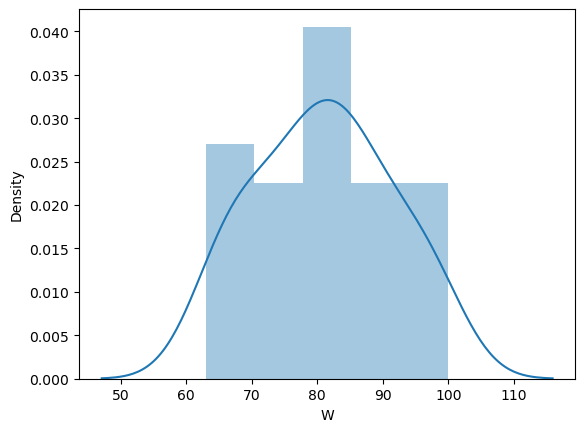

In [9]:
sns.distplot(df['W'])

C:\Users\A\folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R', ylabel='Density'>

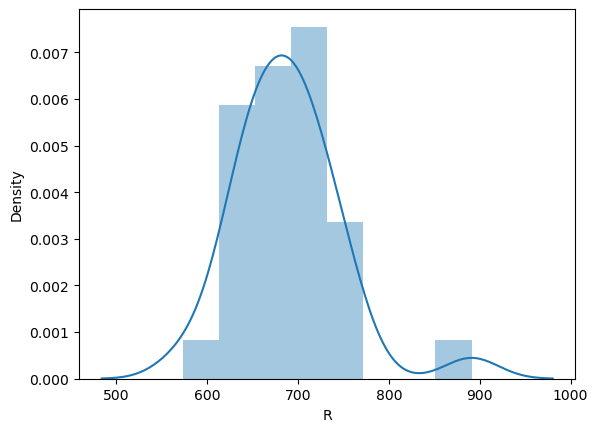

In [10]:
sns.distplot(df['R'])

C:\Users\A\folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AB', ylabel='Density'>

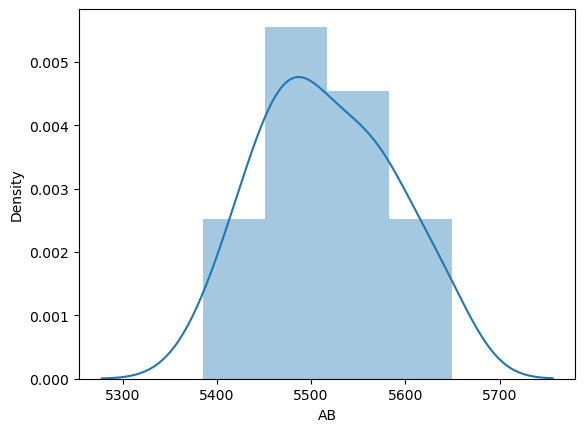

In [11]:
sns.distplot(df['AB'])

C:\Users\A\folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='H', ylabel='Density'>

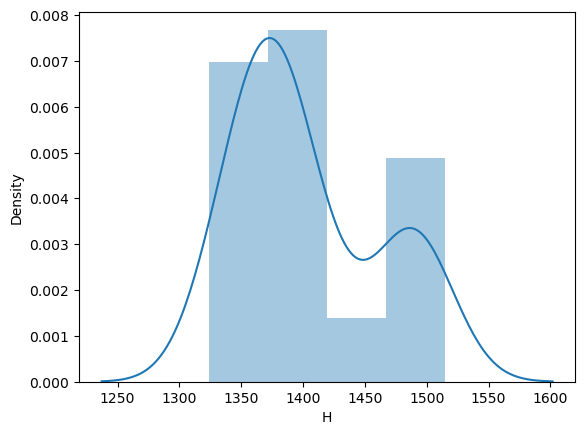

In [12]:
sns.distplot(df['H'])

C:\Users\A\folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2B', ylabel='Density'>

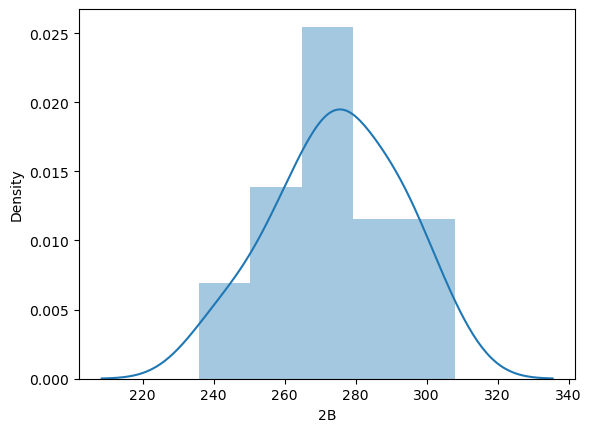

In [13]:
sns.distplot(df['2B'])

C:\Users\A\folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='3B', ylabel='Density'>

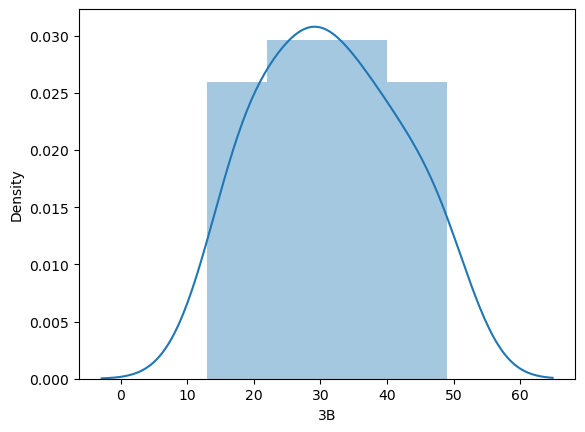

In [14]:
sns.distplot(df['3B'])

C:\Users\A\folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HR', ylabel='Density'>

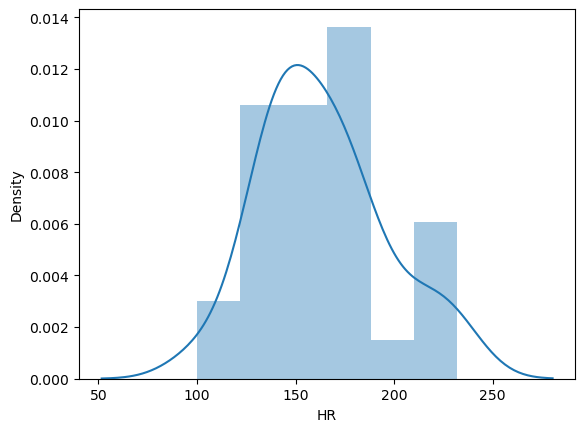

In [15]:
sns.distplot(df['HR'])

C:\Users\A\folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SO', ylabel='Density'>

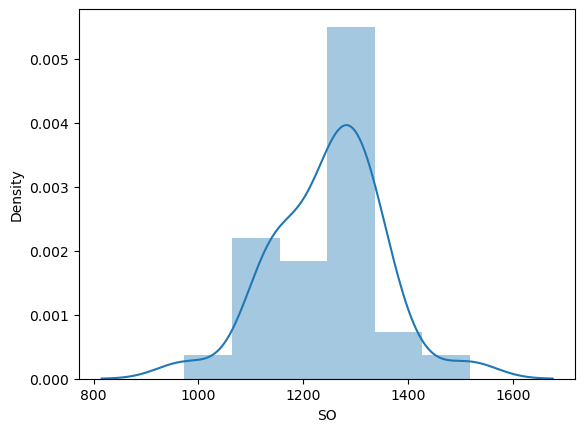

In [16]:
sns.distplot(df['SO'])

C:\Users\A\folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SB', ylabel='Density'>

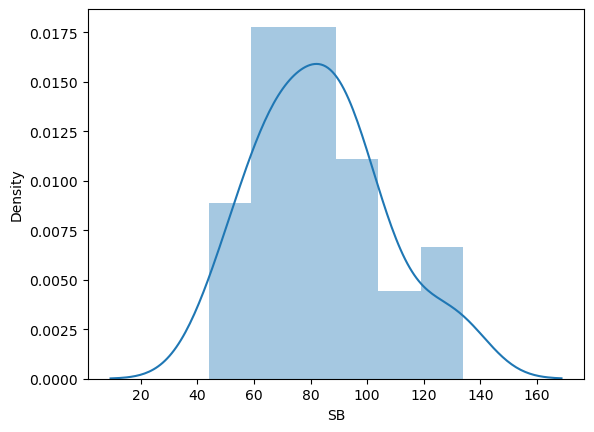

In [17]:
sns.distplot(df['SB'])

C:\Users\A\folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RA', ylabel='Density'>

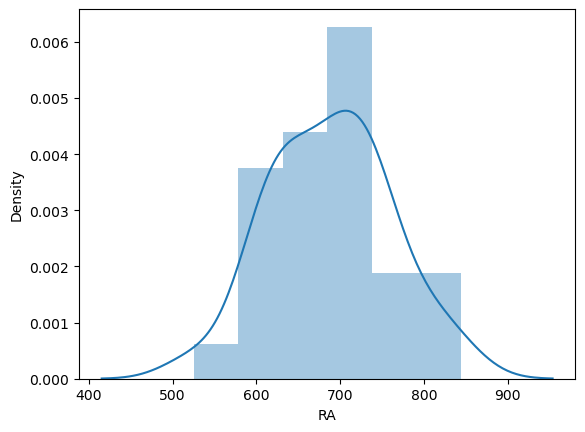

In [18]:
sns.distplot(df['RA'])

C:\Users\A\folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ER', ylabel='Density'>

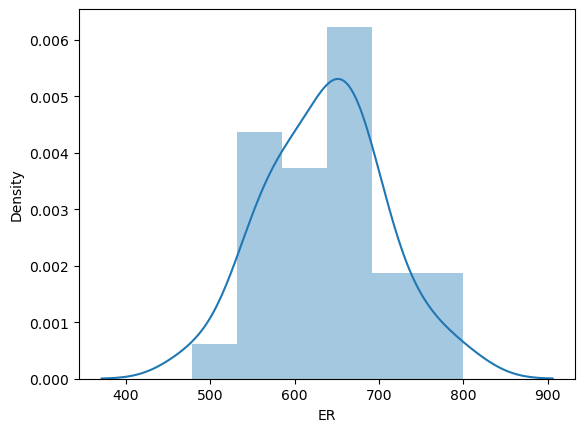

In [19]:
sns.distplot(df['ER'])

C:\Users\A\folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ERA', ylabel='Density'>

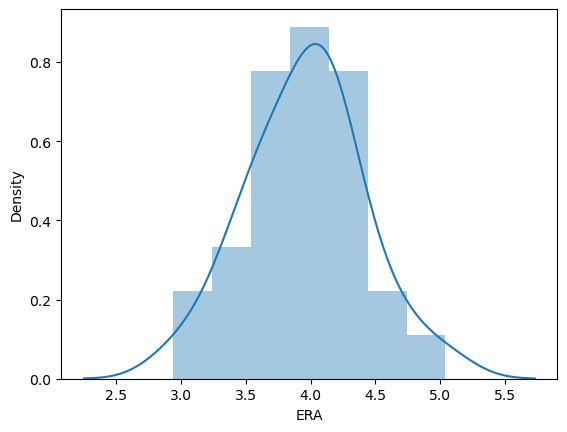

In [20]:
sns.distplot(df['ERA'])

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ERA', ylabel='count'>

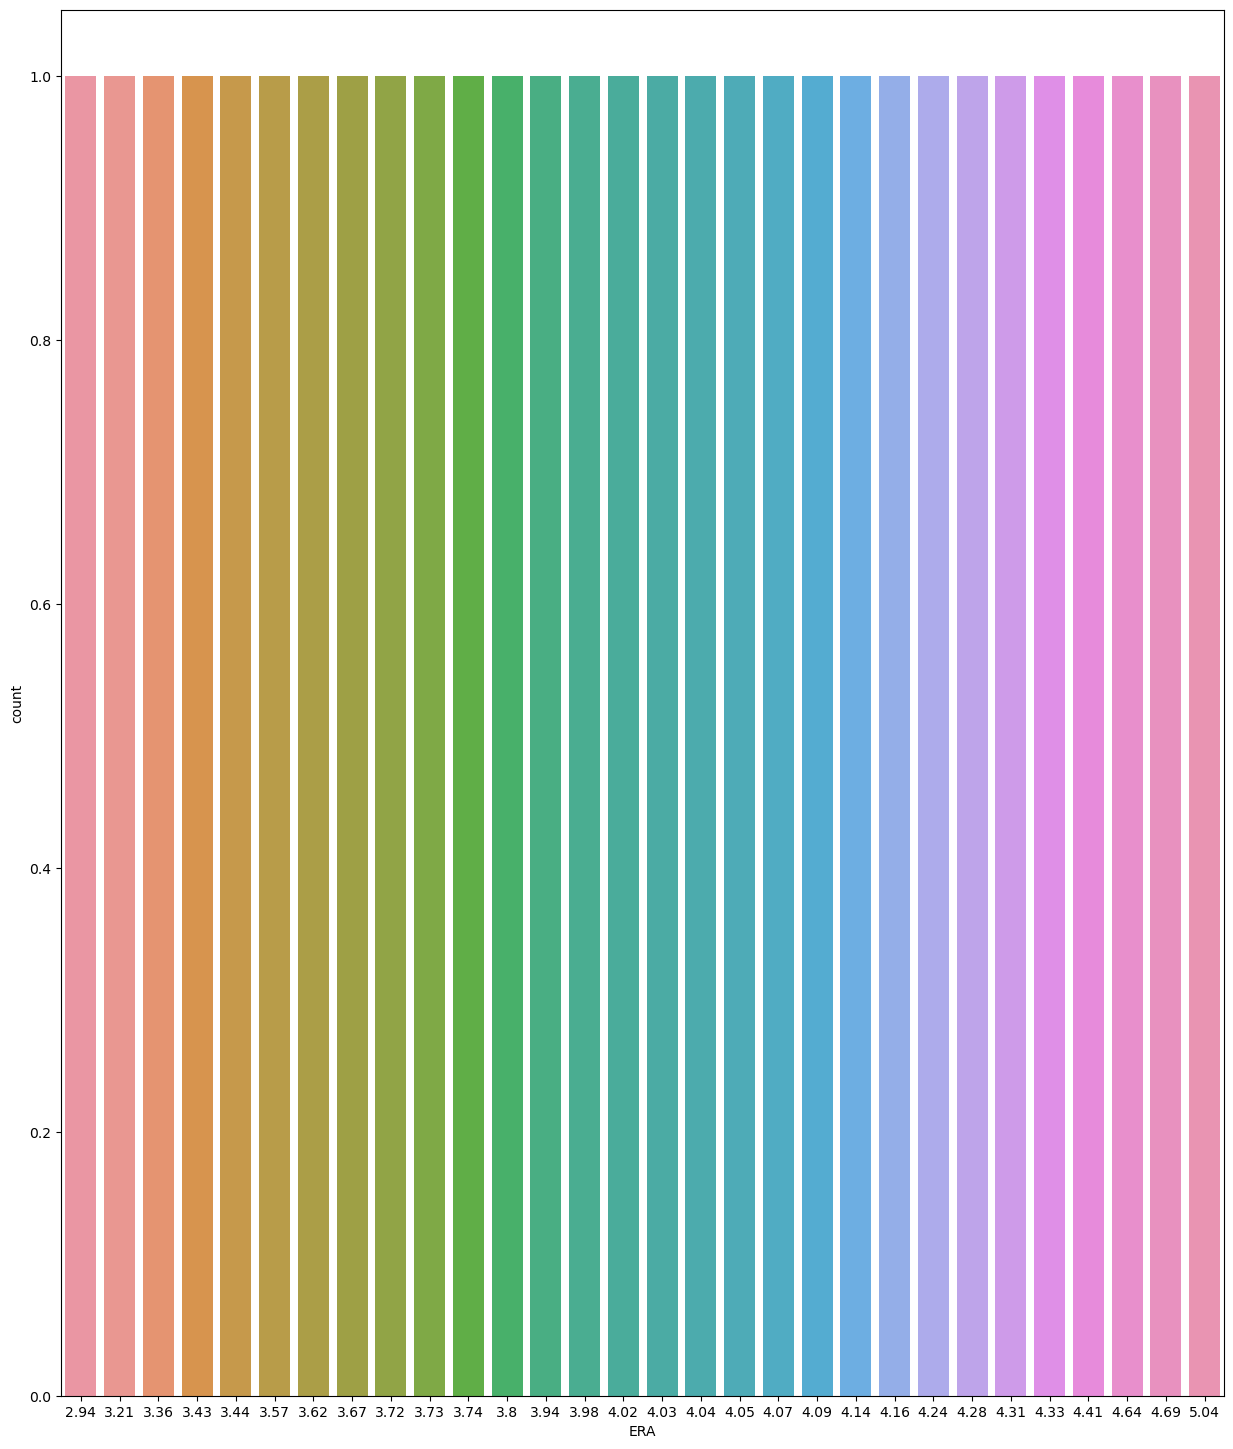

In [21]:
plt.figure(figsize=(15,18))
sns.countplot(df['ERA'])

C:\Users\A\folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CG', ylabel='Density'>

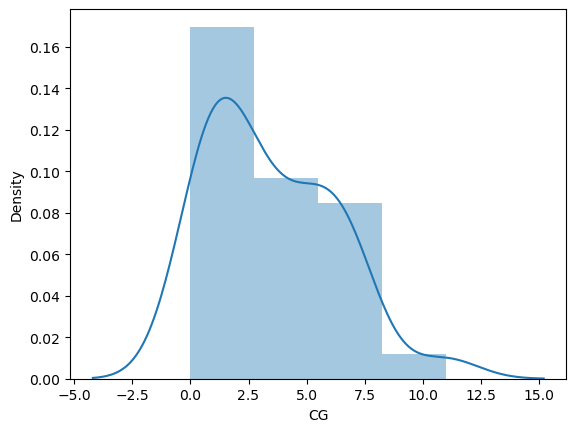

In [22]:
sns.distplot(df['CG'])

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CG', ylabel='count'>

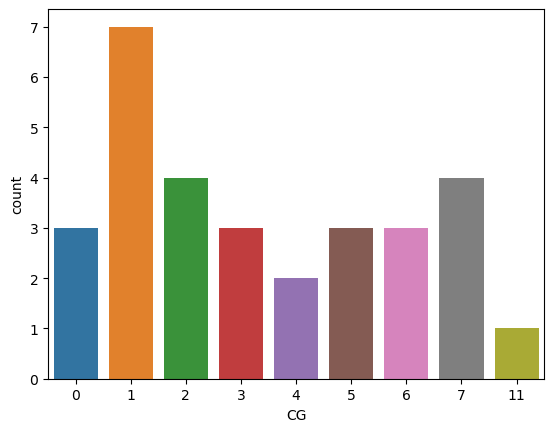

In [23]:
sns.countplot(df['CG'])

C:\Users\A\folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SHO', ylabel='Density'>

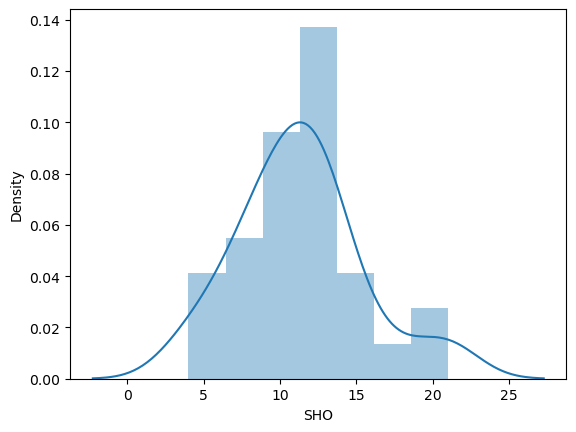

In [24]:
sns.distplot(df['SHO'])

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SHO', ylabel='count'>

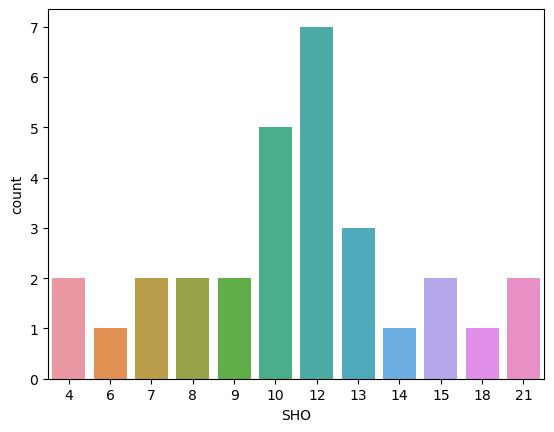

In [25]:
sns.countplot(df['SHO'])

C:\Users\A\folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SV', ylabel='Density'>

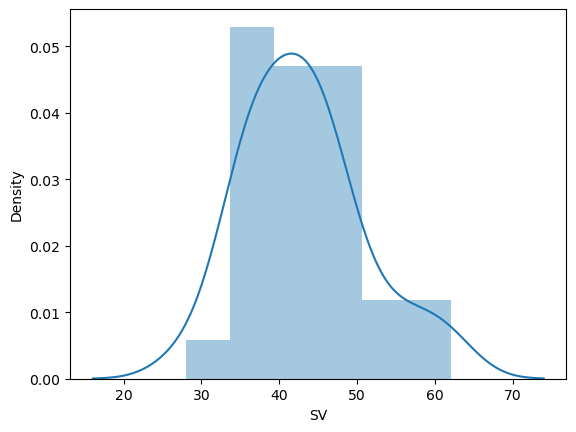

In [26]:
sns.distplot(df['SV'])

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SV', ylabel='count'>

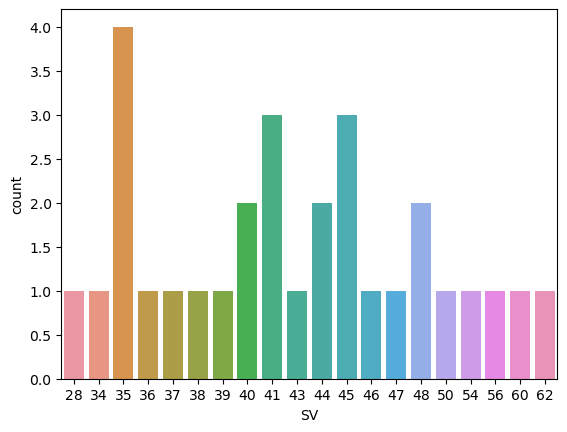

In [27]:
sns.countplot(df['SV'])

C:\Users\A\folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='E', ylabel='Density'>

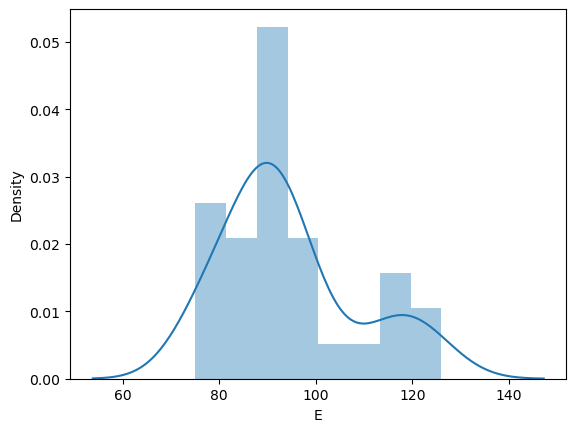

In [28]:
sns.distplot(df['E'])

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='E', ylabel='count'>

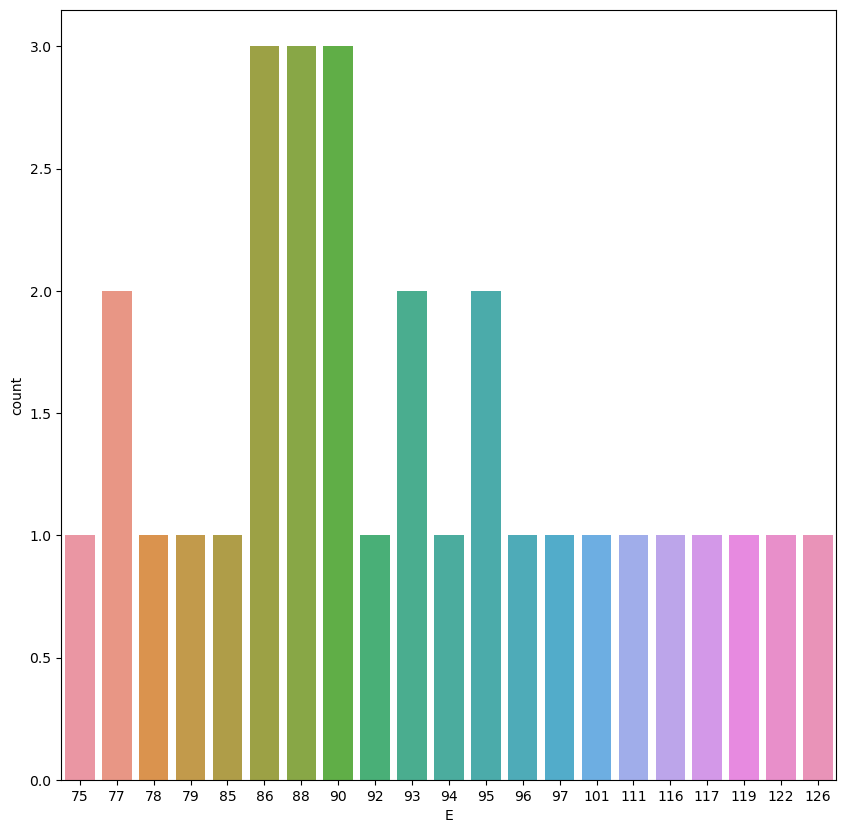

In [29]:
plt.figure(figsize=(10,10))
sns.countplot(df['E'])

# Bivariant Analysis

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R', ylabel='W'>

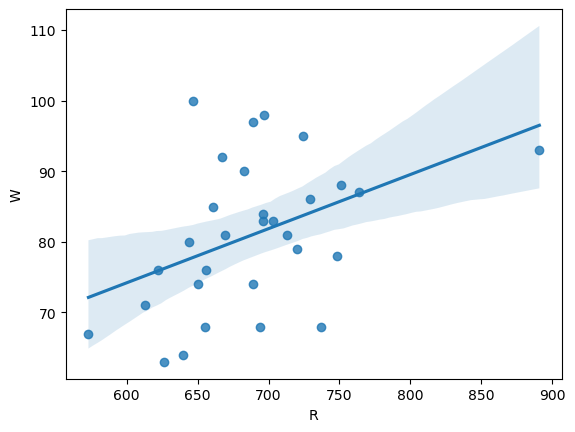

In [30]:
sns.regplot(df['R'],df['W'])

Maximum number of Wins credit to pitcher

In [31]:
df['W'].max()

100

Minimum number of wins credit to pitcher

In [32]:
df['W'].min()

63

Gradually runs are increased and wining number increased

# Check correlation

In [33]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

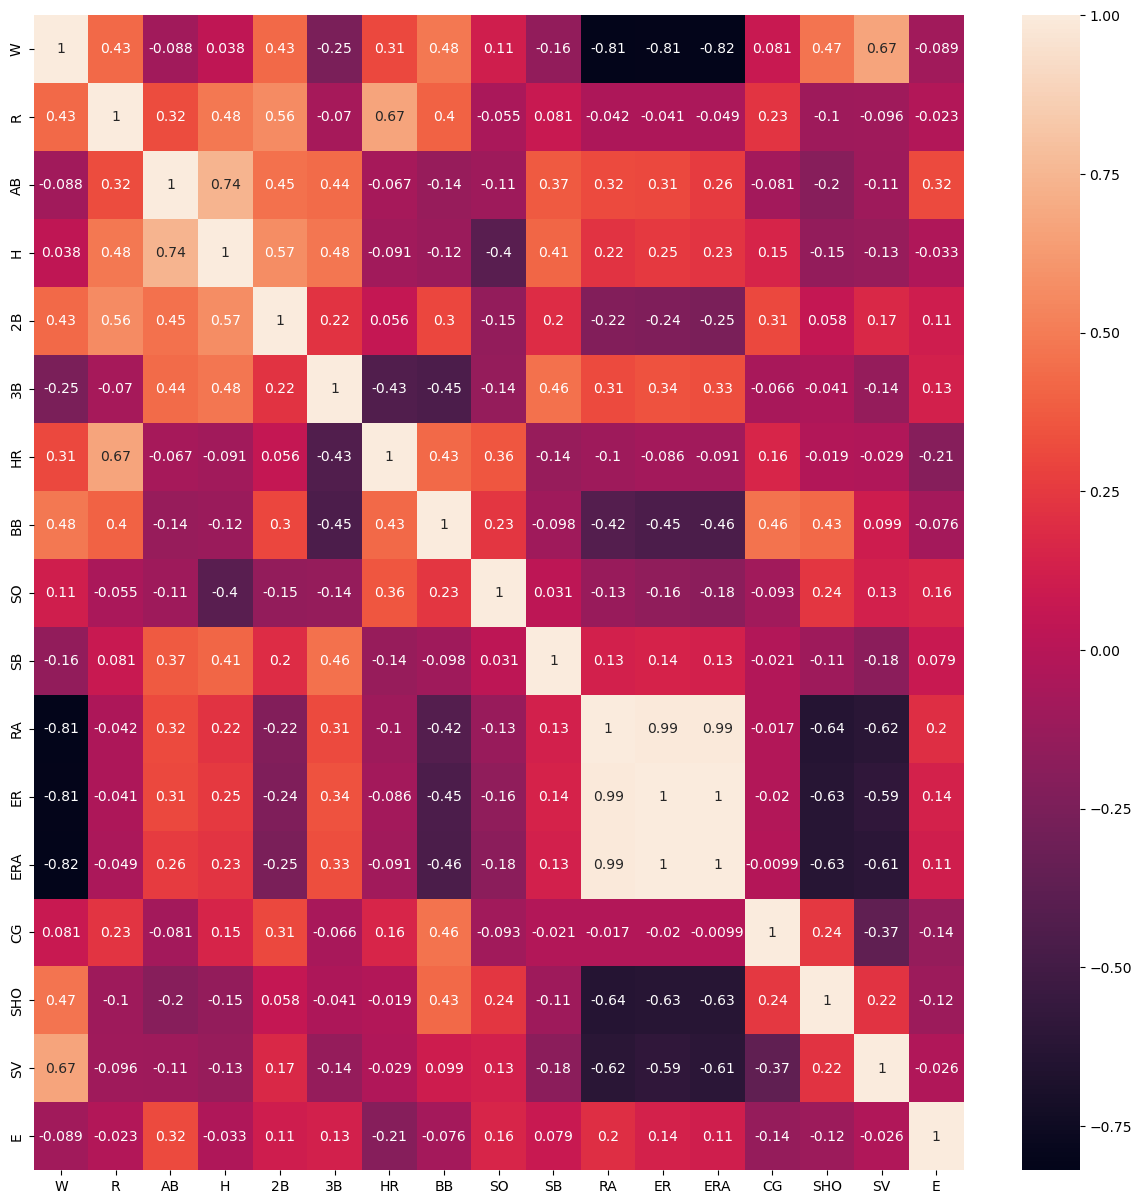

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

in above heat map in black color spotted 'RA','ER','ERA' showing highly negatively correlate 

if they increases so the  wining number decreases, it negatively affect the performance of 'W'

In [35]:
df.corr()['W'].sort_values()

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

<AxesSubplot:>

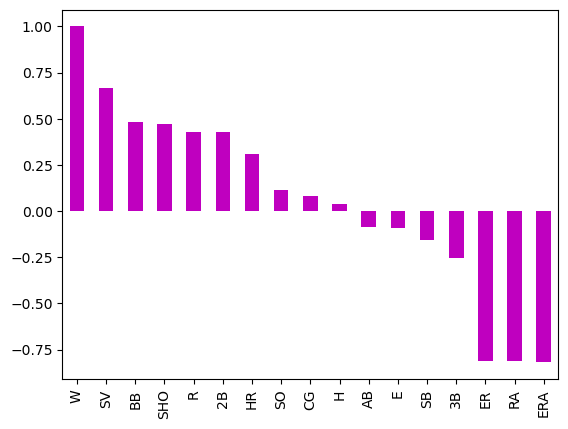

In [36]:
df.corr()['W'].sort_values(ascending=False).plot(kind='bar',color='m')

from the above graph we can see some of the columns are positively correlated and some are negatively correlated

# 'ER' , 'RA' , 'ERA'  are showing highly negatively correlation. Their correlation between (-.70 to -.90 )

1.ER-->Earned Run.Number of runs that did not occur as a result of errors or passed balls.

2.RA--> Run Avearage

3.ERA--> This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched 

# 'AB' , 'E' , 'SB'  are correlation between(.00 to -.030)

1.They negligible correlated with 'W'

In [37]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

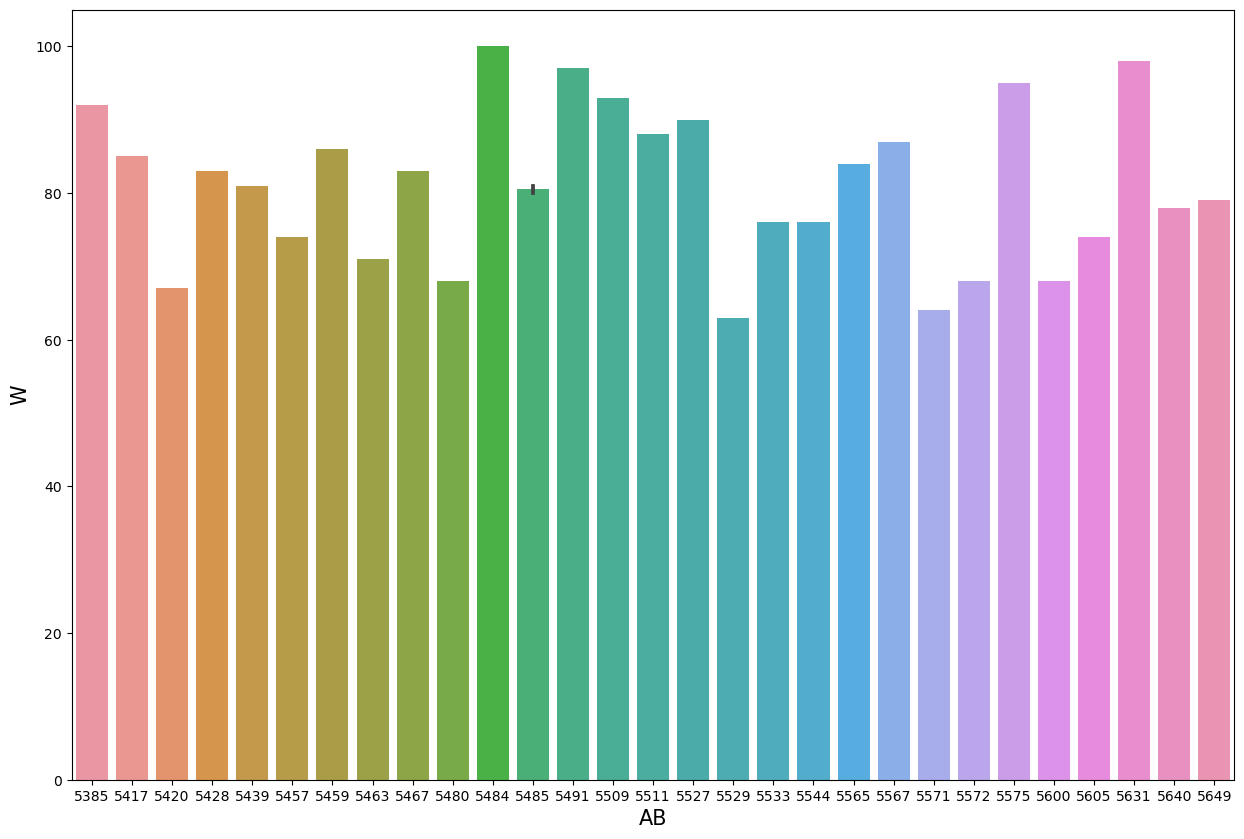

In [38]:
# Relation between W and AB
#AB--> AT Bat or Bat at time. It's is a batter's turn batting against a pitcher
plt.figure(figsize=(15,10))
sns.barplot(df['AB'],df['W'])
plt.xlabel("AB",fontsize='15')
plt.ylabel("W",fontsize='15')

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

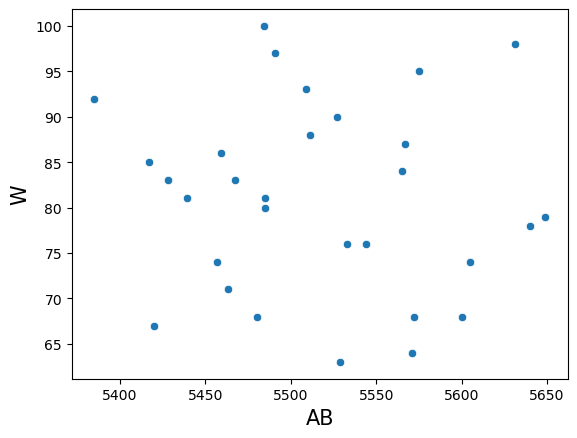

In [39]:
sns.scatterplot(df['AB'],df['W'])
plt.xlabel("AB",fontsize='15')
plt.ylabel("W",fontsize='15')

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

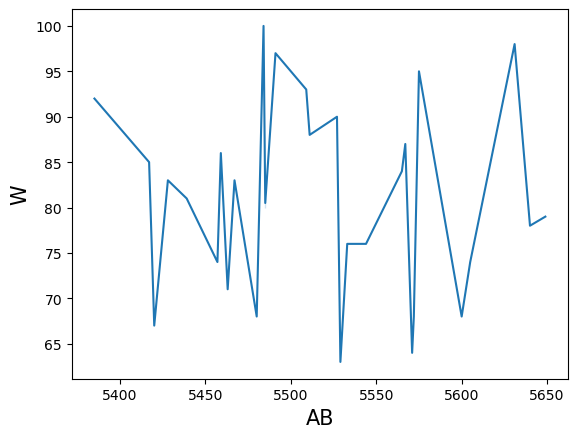

In [40]:
sns.lineplot(df['AB'],df['W'])
plt.xlabel("AB",fontsize='15')
plt.ylabel("W",fontsize='15')

no relation is indentified

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

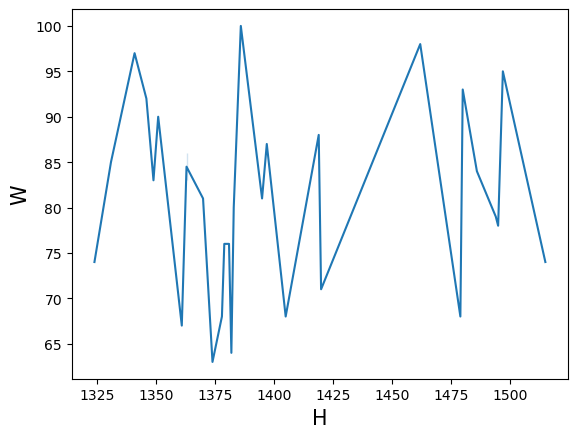

In [41]:
# Relation between Hit or base hit(H) with "W"
sns.lineplot(df['H'],df['W'])
plt.xlabel("H",fontsize='15')
plt.ylabel("W",fontsize='15')

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

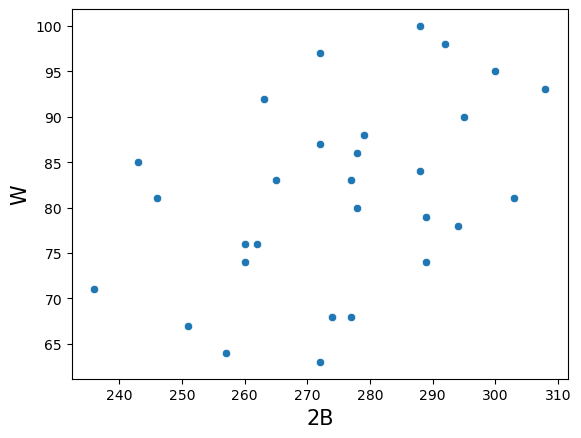

In [42]:
# Relation between 2B and W
#2B-->"two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.
sns.scatterplot(df['2B'],df['W'])
plt.xlabel("2B",fontsize='15')
plt.ylabel("W",fontsize='15')

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

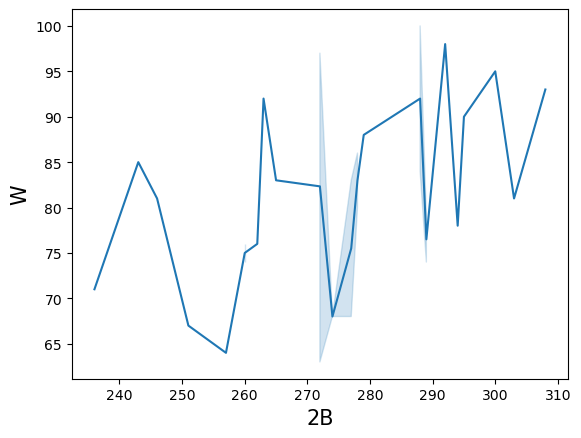

In [43]:
sns.lineplot(df['2B'],df['W'])
plt.xlabel("2B",fontsize='15')
plt.ylabel("W",fontsize='15')

it showing positive relation with W

if 2B is increase so w will increase

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

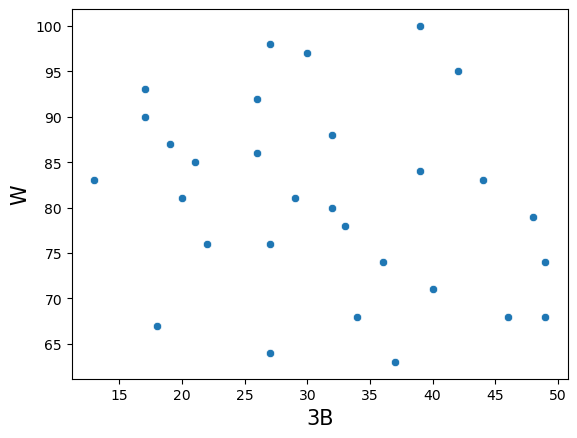

In [44]:
# Relation between 3B and W
# 3B--> Three-bagger or three-base-hit, This measns a Triple.It's is the act of a batter safely reaching third base after hitting the ball, 
sns.scatterplot(df['3B'],df['W'])
plt.xlabel("3B",fontsize='15')
plt.ylabel("W",fontsize='15')

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

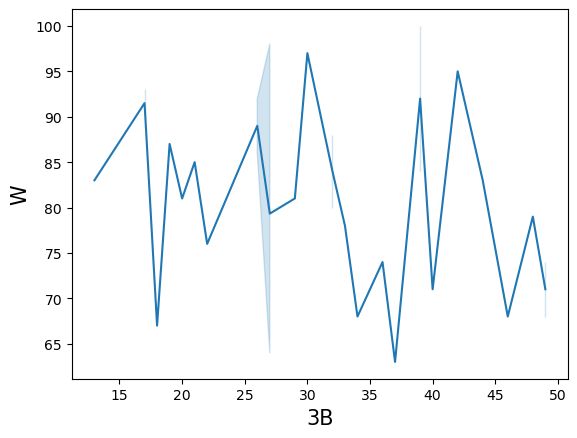

In [45]:
sns.lineplot(df['3B'],df['W'])
plt.xlabel("3B",fontsize='15')
plt.ylabel("W",fontsize='15')

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

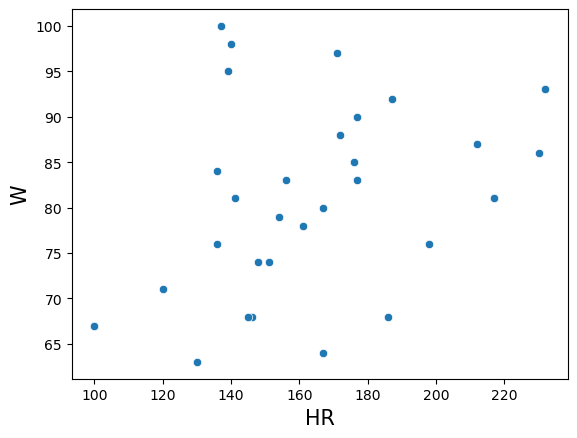

In [46]:
sns.scatterplot(df['HR'],df['W'])
plt.xlabel("HR",fontsize='15')
plt.ylabel("W",fontsize='15')

As HR is increses number of wins is increases

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

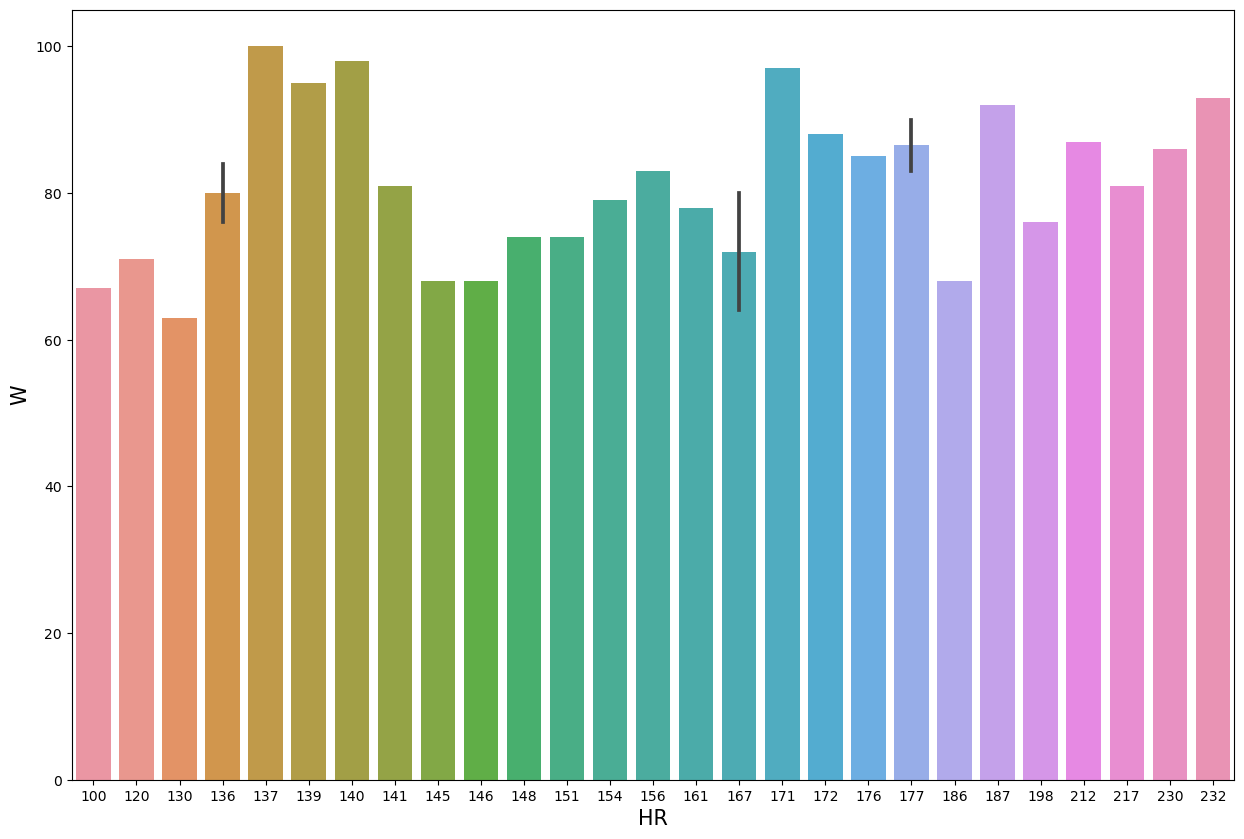

In [47]:
plt.figure(figsize=(15,10))
sns.barplot(df['HR'],df['W'])
plt.xlabel("HR",fontsize='15')
plt.ylabel("W",fontsize='15')

In [48]:
print(df['HR'].max()),print(df['HR'].min())

232
100


(None, None)

In [49]:
hr=df.groupby('W')[['HR']].sum()
hr

,HR
W,
63,130
64,167
67,100
68,477
71,120
74,299
76,334
78,161
79,154


In [50]:
hr.max()

HR    477
dtype: int64

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

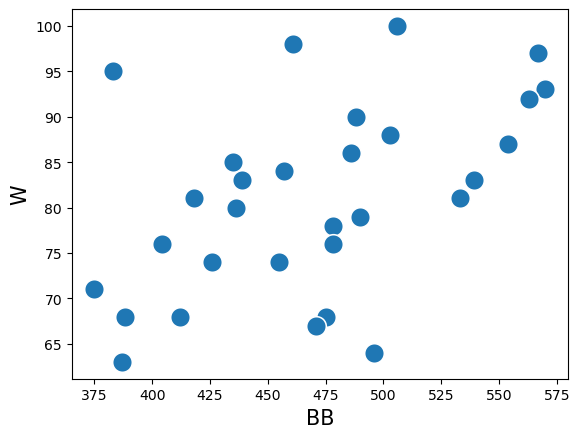

In [51]:
sns.scatterplot(df['BB'],df['W'],s=200)
plt.xlabel("BB",fontsize='15')
plt.ylabel("W",fontsize='15')

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

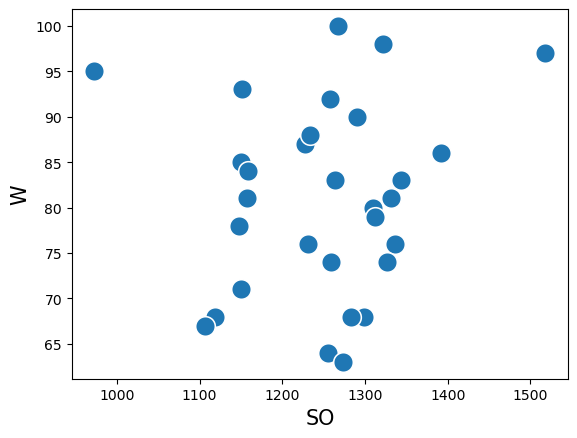

In [52]:
sns.scatterplot(df['SO'],df['W'],s=200)
plt.xlabel("SO",fontsize='15')
plt.ylabel("W",fontsize='15')

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

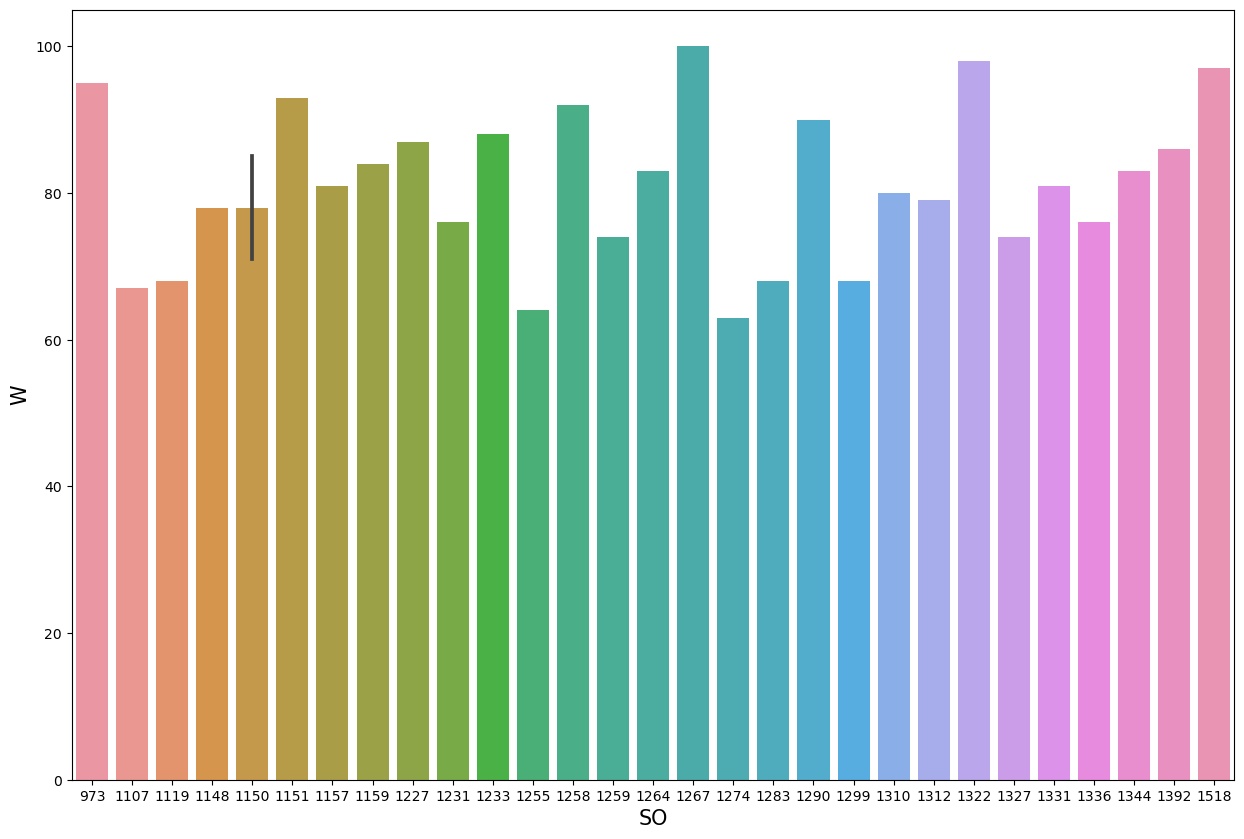

In [53]:
plt.figure(figsize=(15,10))
sns.barplot(df['SO'],df['W'])
plt.xlabel("SO",fontsize='15')
plt.ylabel("W",fontsize='15')

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

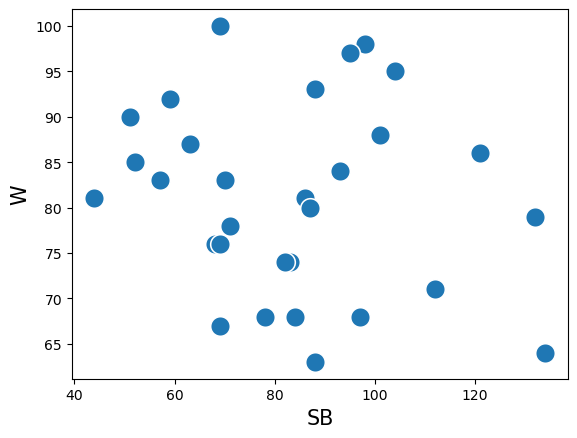

In [54]:
# relation between SB and W
sns.scatterplot(df['SB'],df['W'],s=200)
plt.xlabel("SB",fontsize='15')
plt.ylabel("W",fontsize='15')

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

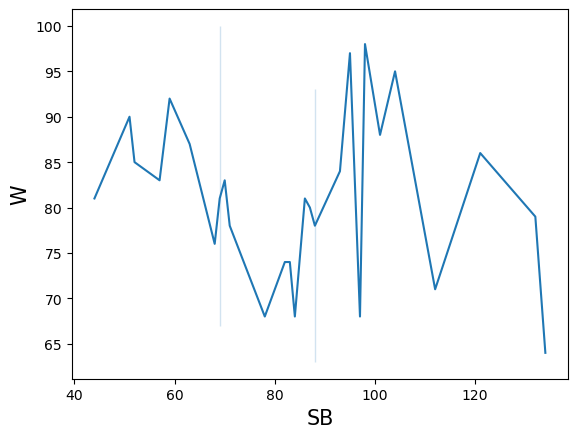

In [55]:
sns.lineplot(df['SB'],df['W'])
plt.xlabel("SB",fontsize='15')
plt.ylabel("W",fontsize='15')

if SB will increase then wil decreases

it is inversely proportional to the W

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

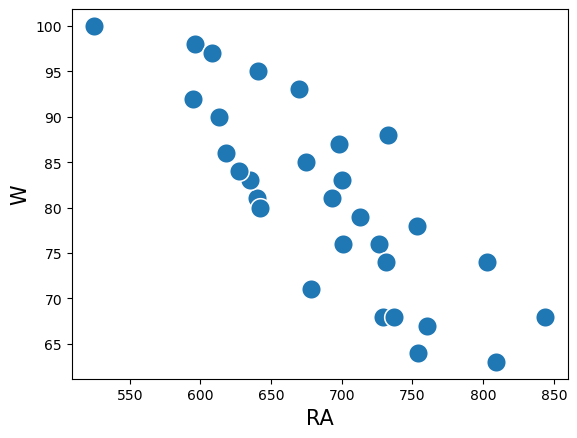

In [56]:
# relation between RA and W
# RA--> Run average,It refer to measures of the rate at which runs are allowed or scored.
sns.scatterplot(df['RA'],df['W'],s=200)
plt.xlabel("RA",fontsize='15')
plt.ylabel("W",fontsize='15')

it is showing negative relation with W

if RA is increases so W is decreases

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

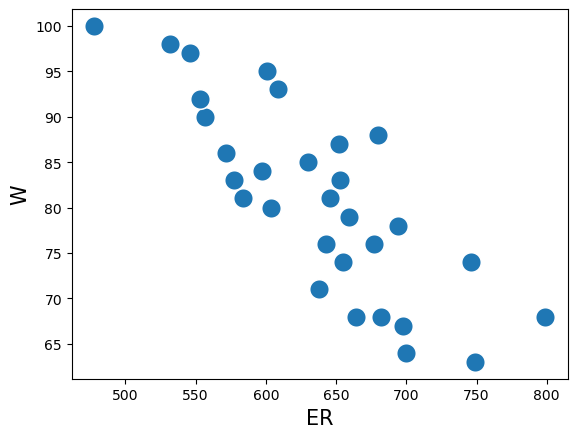

In [57]:
# relation between ER and W
# ER--> Earned Runs.number of runs that did not occur as a result of errors or passed balls.
sns.scatterplot(df['ER'],df['W'],s=200)
plt.xlabel("ER",fontsize='15')
plt.ylabel("W",fontsize='15')

it is also showing negative realtion 

ER increase with derease of W

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

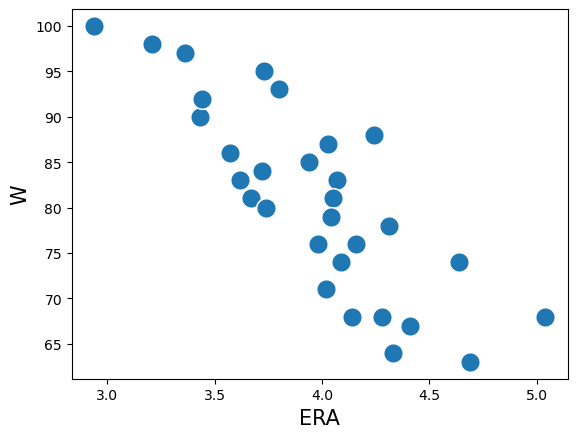

In [58]:
# relation between ERA and W
# ERA--> Earned Runs Average.It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). 
sns.scatterplot(df['ERA'],df['W'],s=200)
plt.xlabel("ERA",fontsize='15')
plt.ylabel("W",fontsize='15')

it is also showing negative realtion

 As ERA increase with derease of W

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

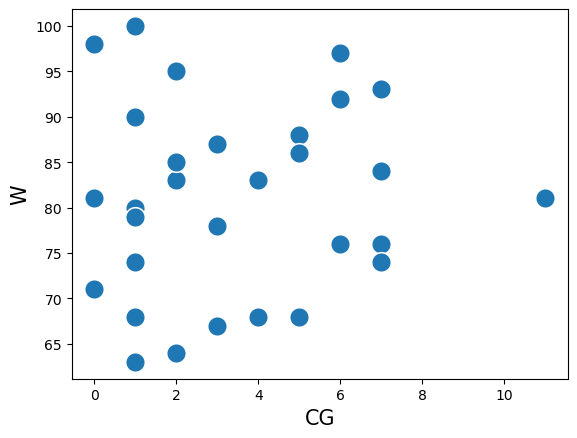

In [59]:
# relation between CG and W
# CG-->This means Complete Game : number of games where player was the only pitcher for their team. 
sns.scatterplot(df['CG'],df['W'],s=200)
plt.xlabel("CG",fontsize='15')
plt.ylabel("W",fontsize='15')

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

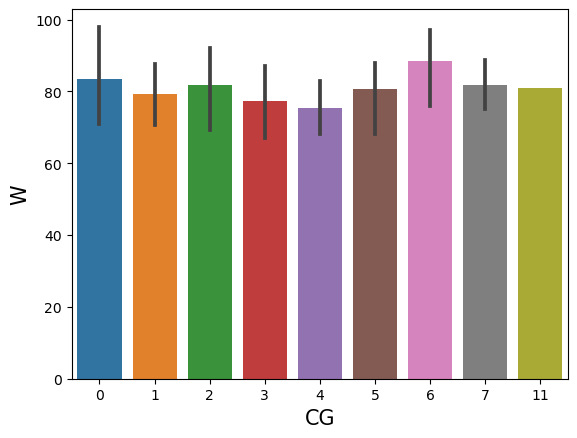

In [60]:
sns.barplot(df['CG'],df['W'])
plt.xlabel("CG",fontsize='15')
plt.ylabel("W",fontsize='15')

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

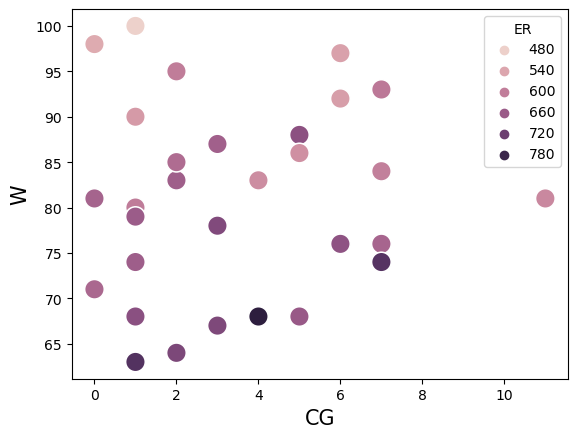

In [61]:
# Relation between CG , W  and ER
sns.scatterplot(df['CG'],df['W'],hue=df['ER'],s=200)
plt.xlabel("CG",fontsize='15')
plt.ylabel("W",fontsize='15')

CG is showing positive relation with W

as no. of games in pitcher was pitching in entire game is increases then no. of wining games increases
and  also ER dereases with CG thats a good 

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

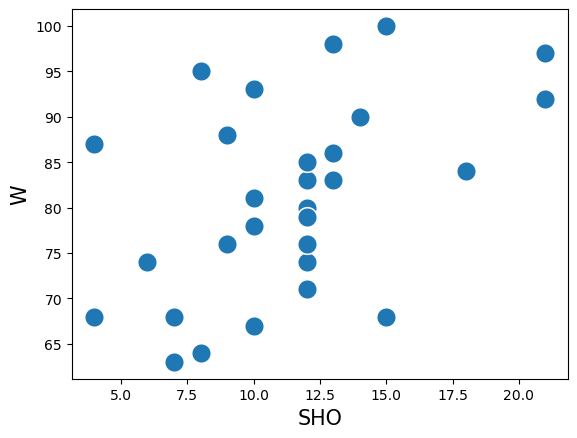

In [62]:
# relation between SHO and W
# SHO-->Shutout . number of complete games pitched with no runs allowed.
sns.scatterplot(df['SHO'],df['W'],s=200)
plt.xlabel("SHO",fontsize='15')
plt.ylabel("W",fontsize='15')

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

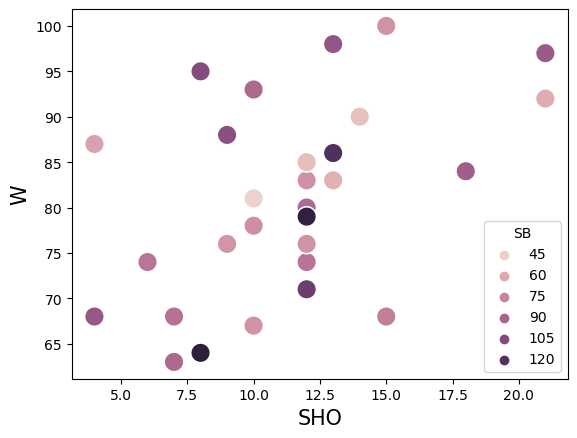

In [63]:
# relation between SHO and W and SB
sns.scatterplot(df['SHO'],df['W'],hue=df['SB'],s=200)
plt.xlabel("SHO",fontsize='15')
plt.ylabel("W",fontsize='15')

if SHO is increase so no. of wining game(W) also increase and Stolen Base(SB)

SHO is showing positive realtion towards W

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

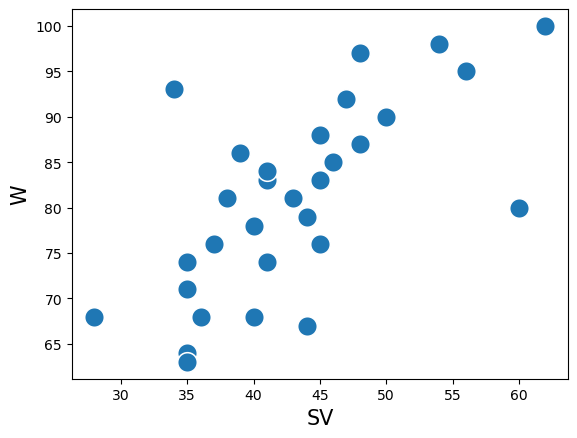

In [64]:
# relation between SV and W
# SV-->Save. : number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering 
sns.scatterplot(df['SV'],df['W'],s=200)
plt.xlabel("SV",fontsize='15')
plt.ylabel("W",fontsize='15')

it is showing high positive relation with W

if no of ganes in which pitcher enters led the game will increase then "W" will also increase

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'W')

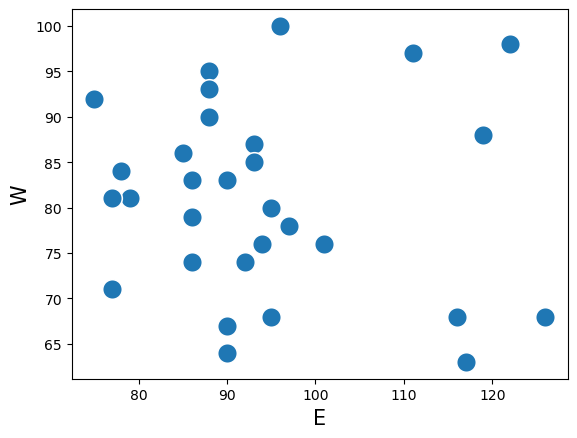

In [65]:
# relation between E and W
# E-->Error
sns.scatterplot(df['E'],df['W'],s=200)
plt.xlabel("E",fontsize='15')
plt.ylabel("W",fontsize='15')

its showing inversely proportional to the no. of wins

if Error will decrease then no. wins (W) will increase  its a good thing for pitcher

In [66]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [67]:
col=['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


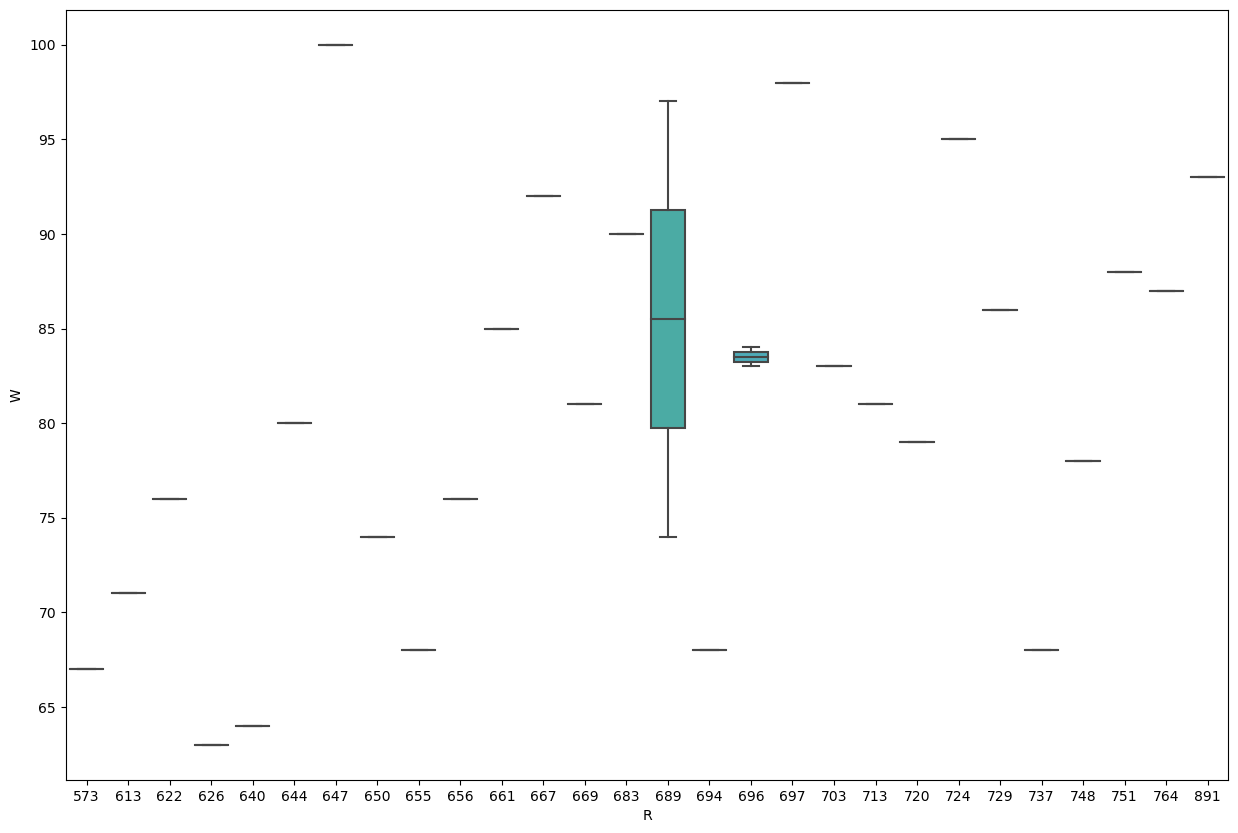

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


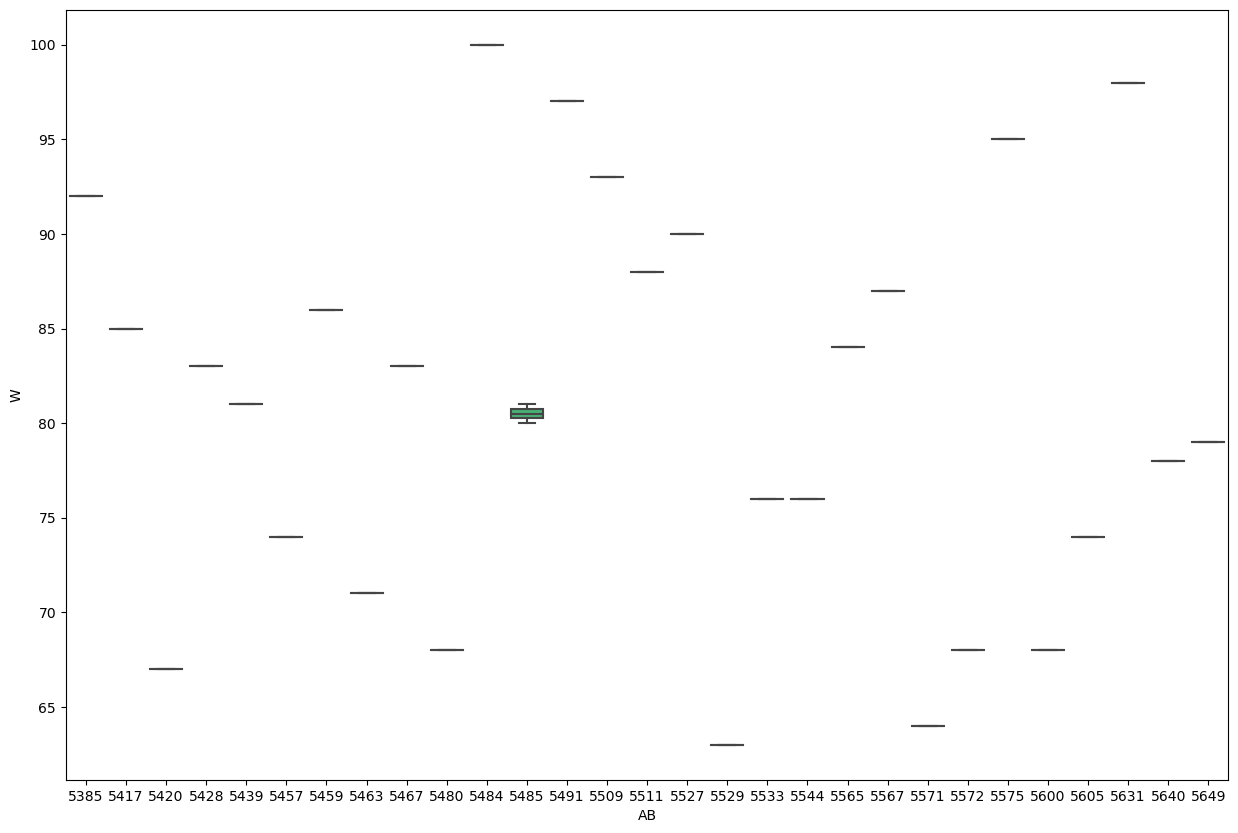

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


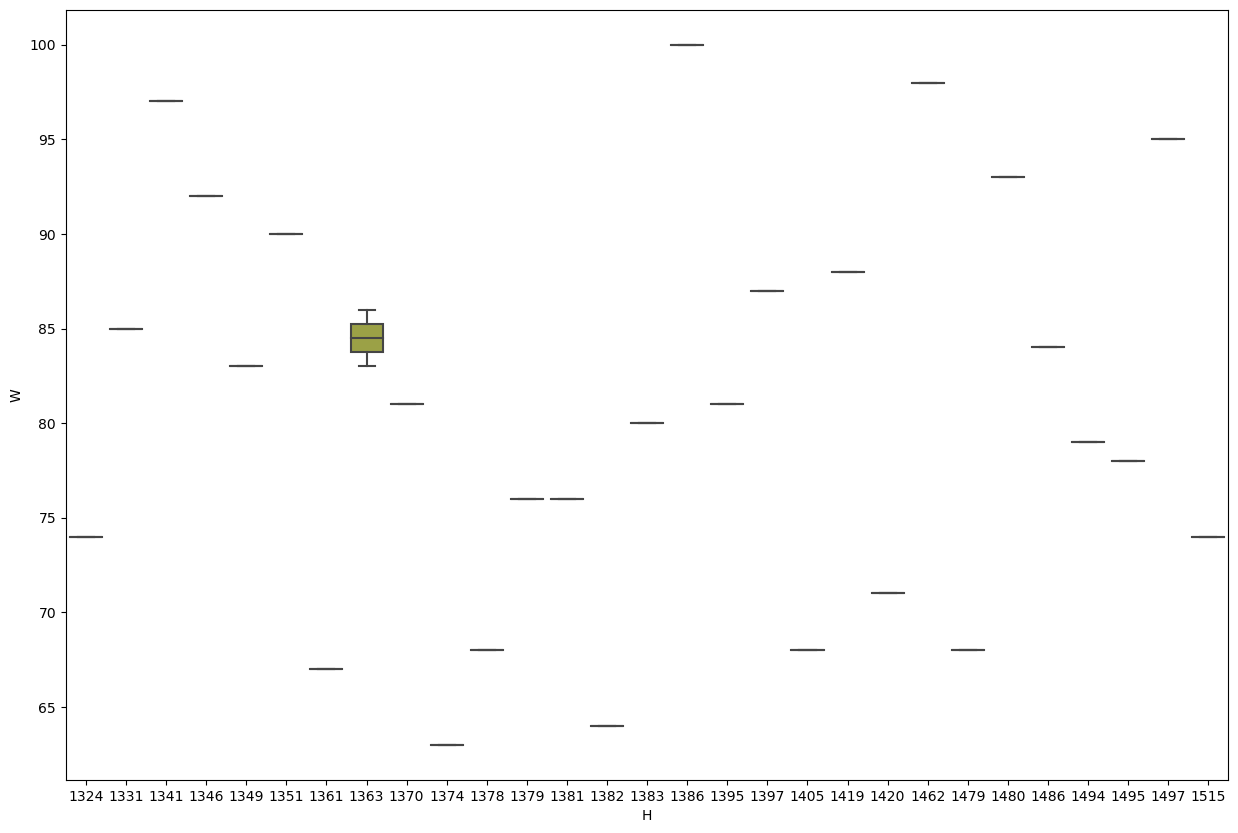

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


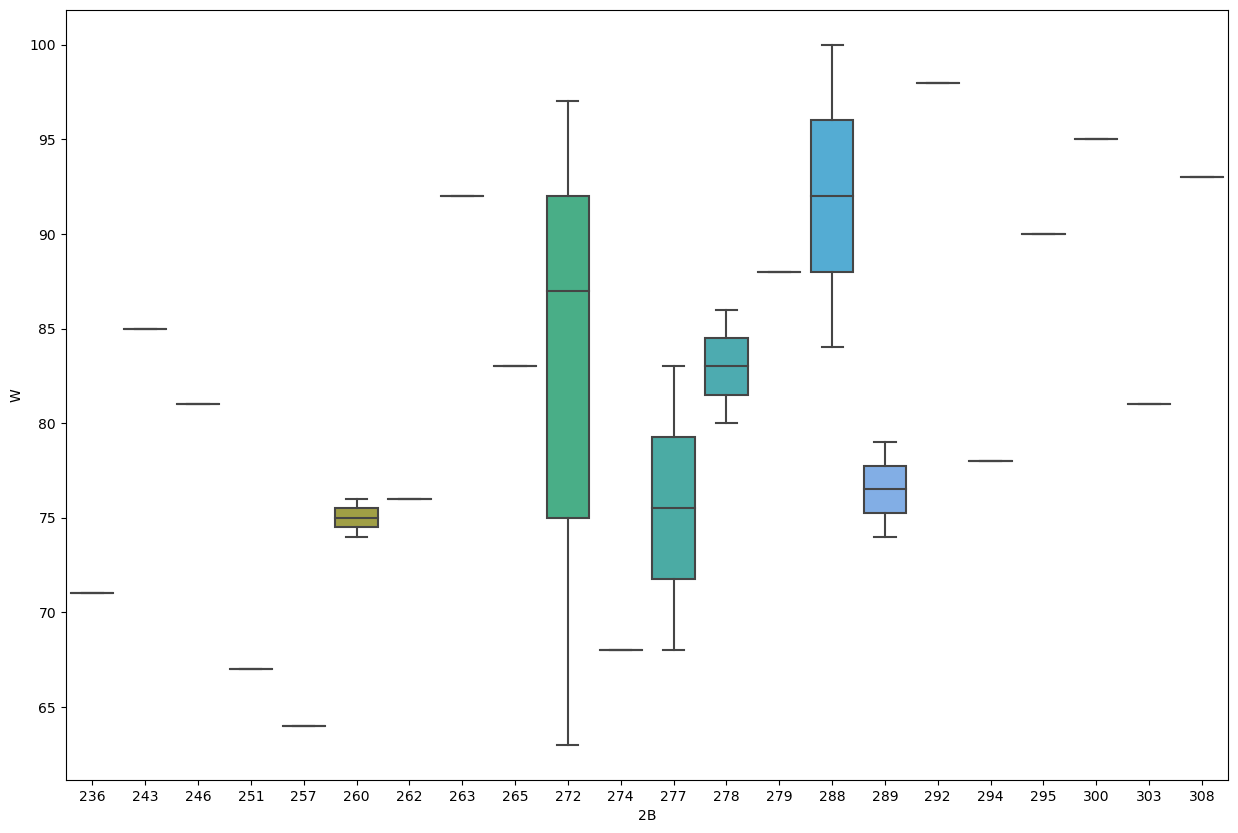

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


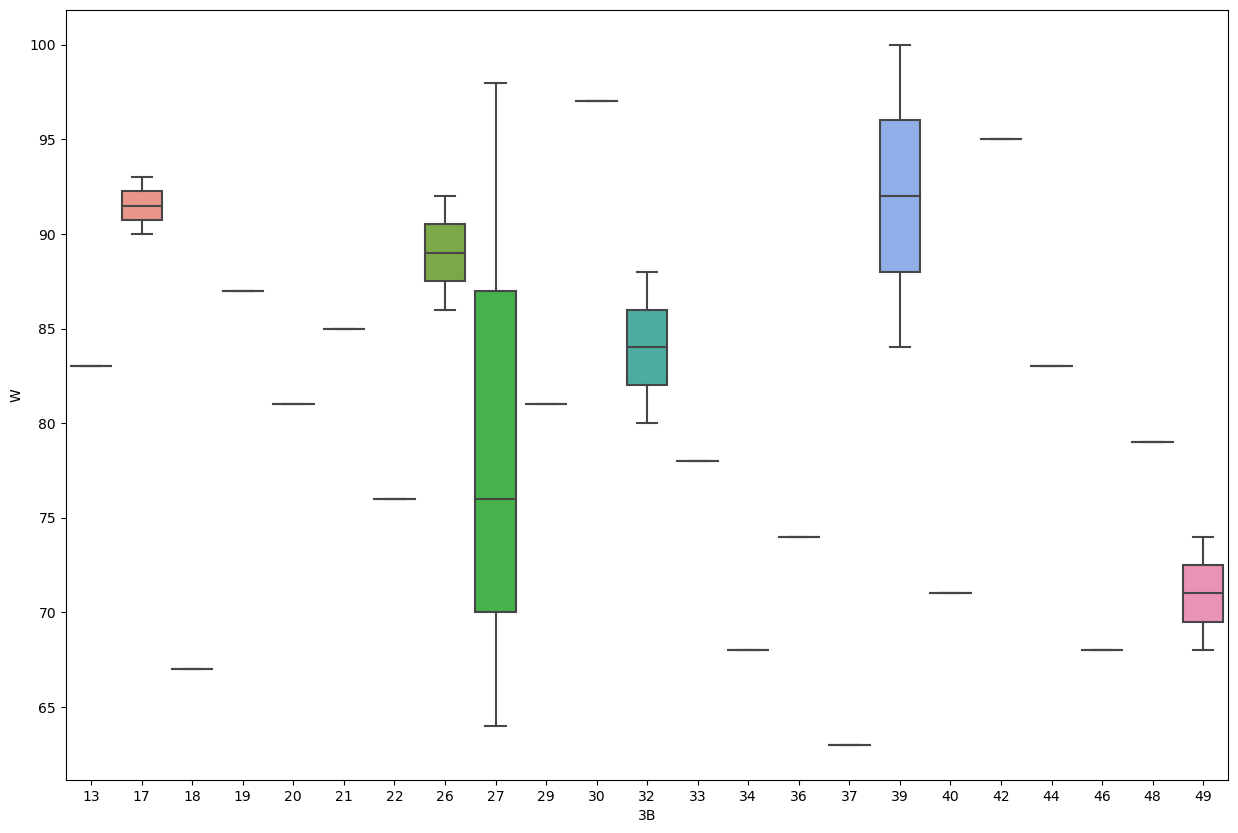

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


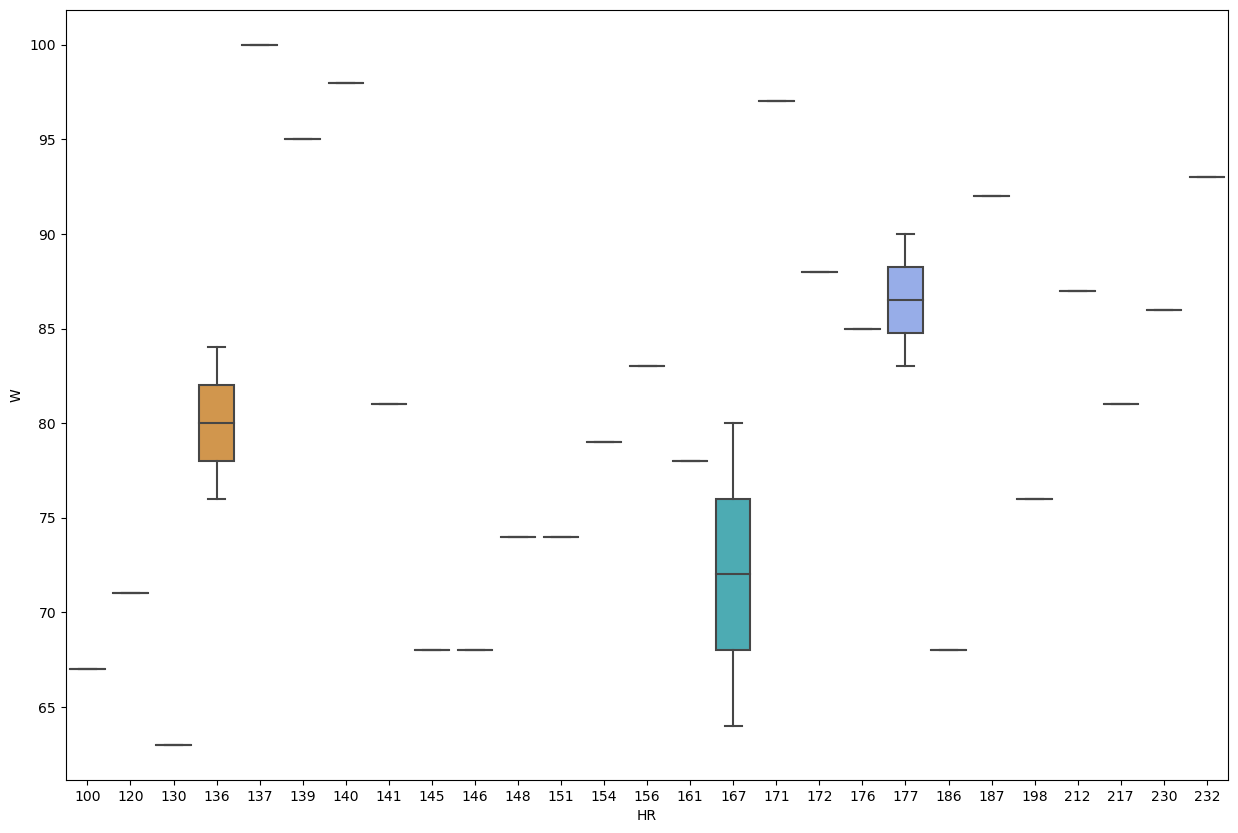

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


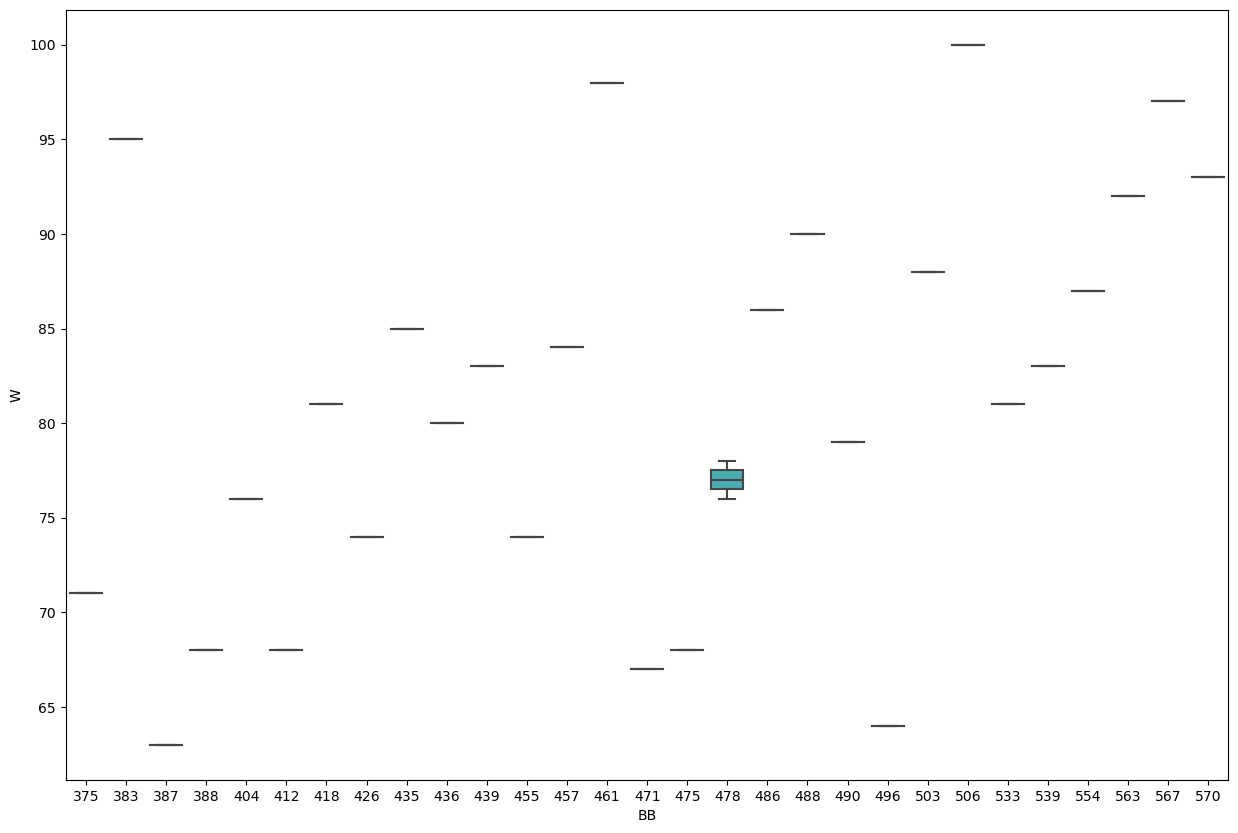

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


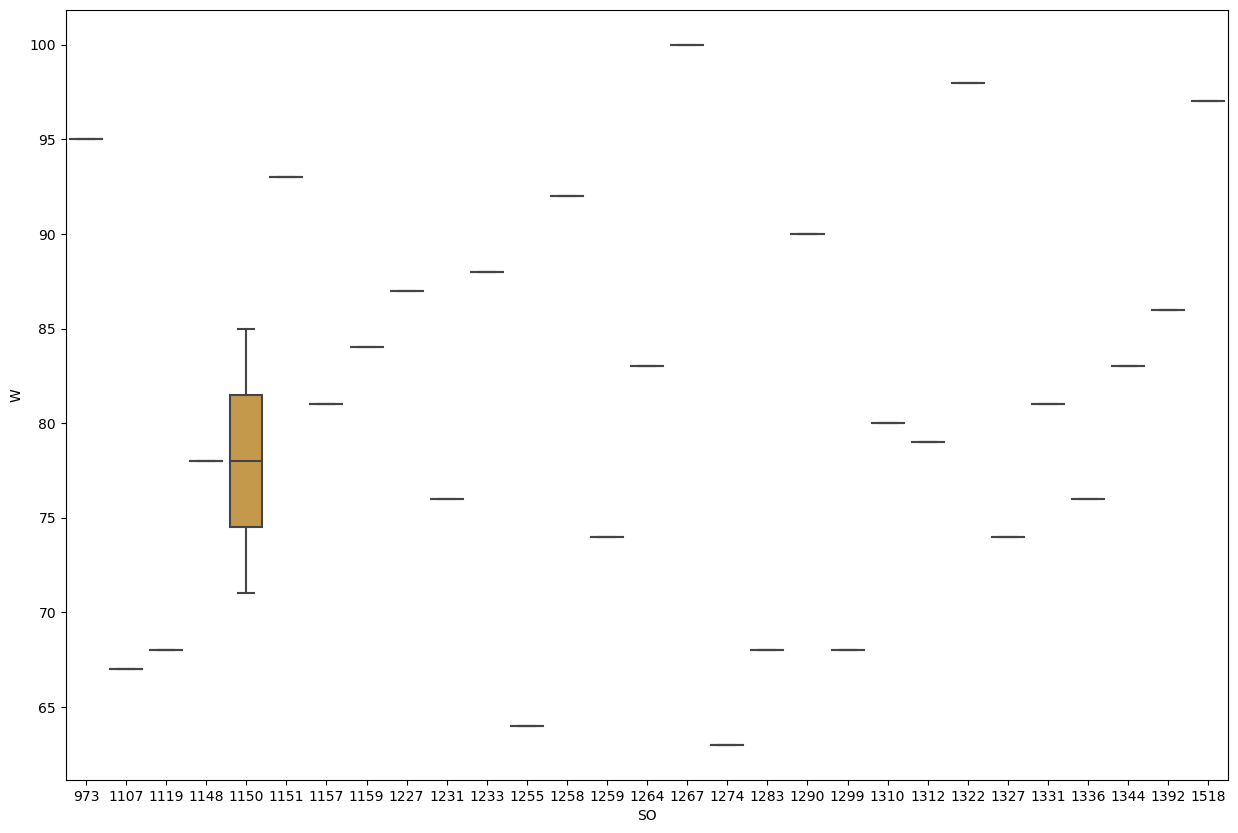

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


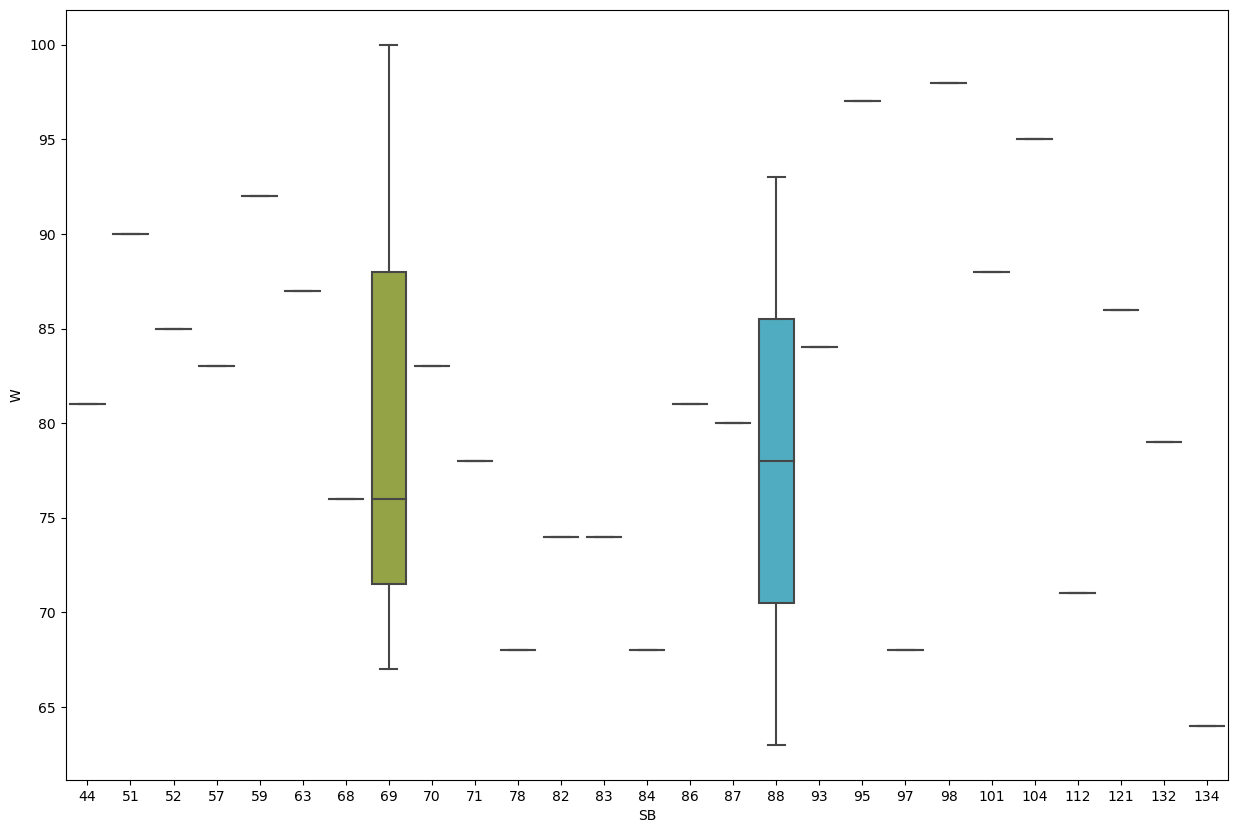

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


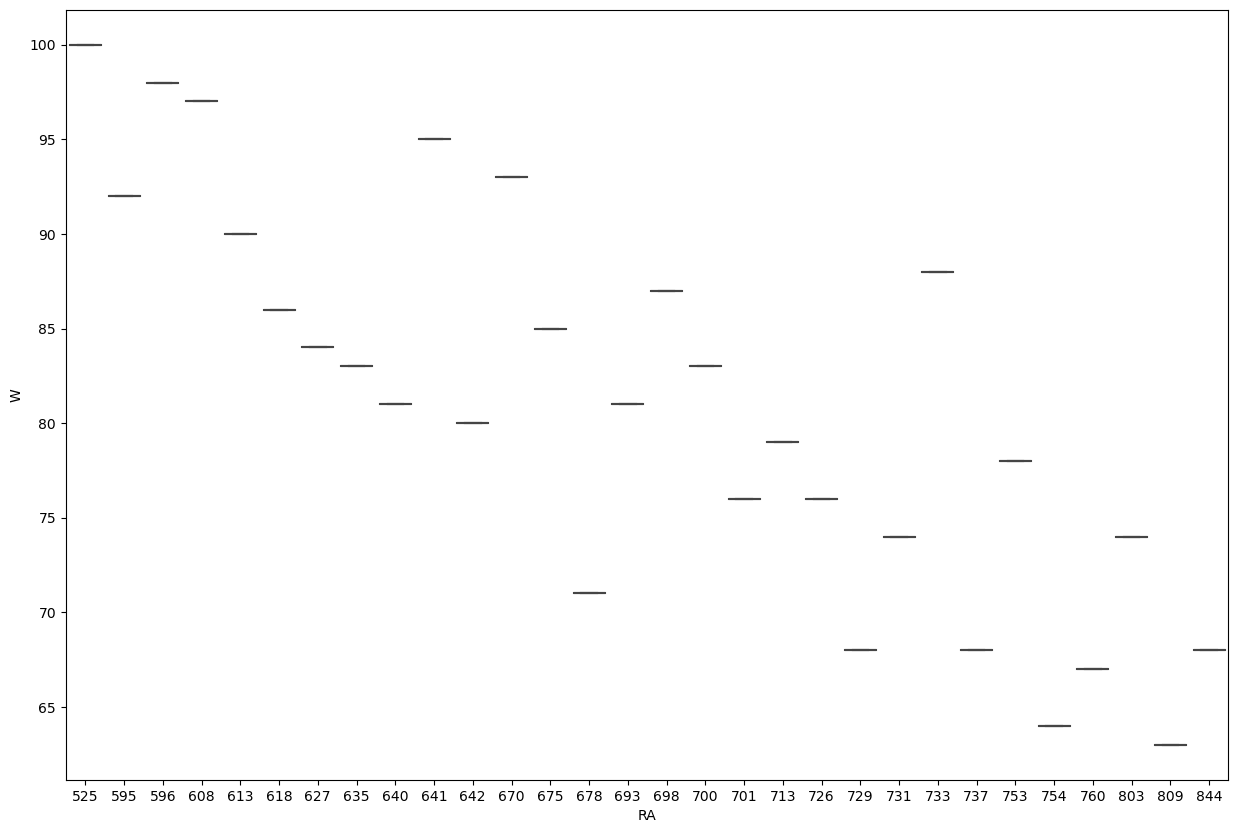

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


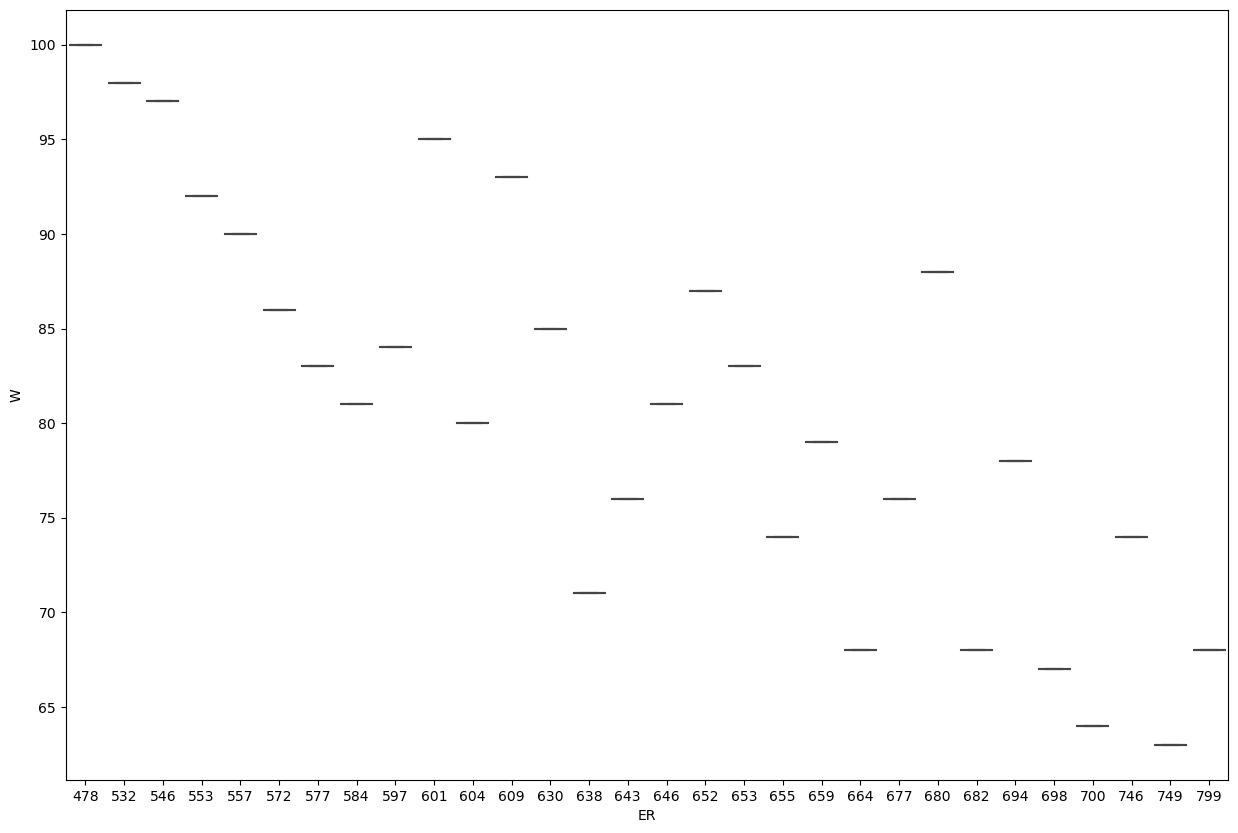

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


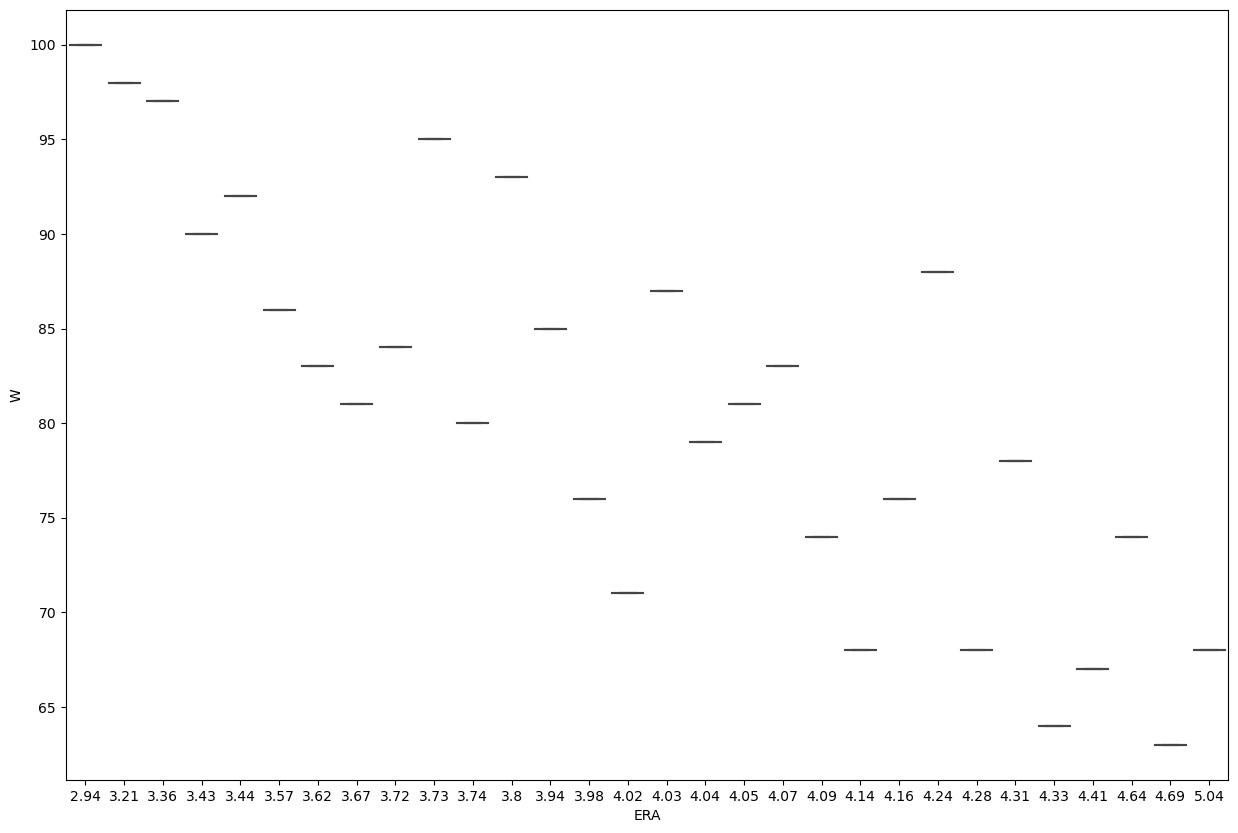

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


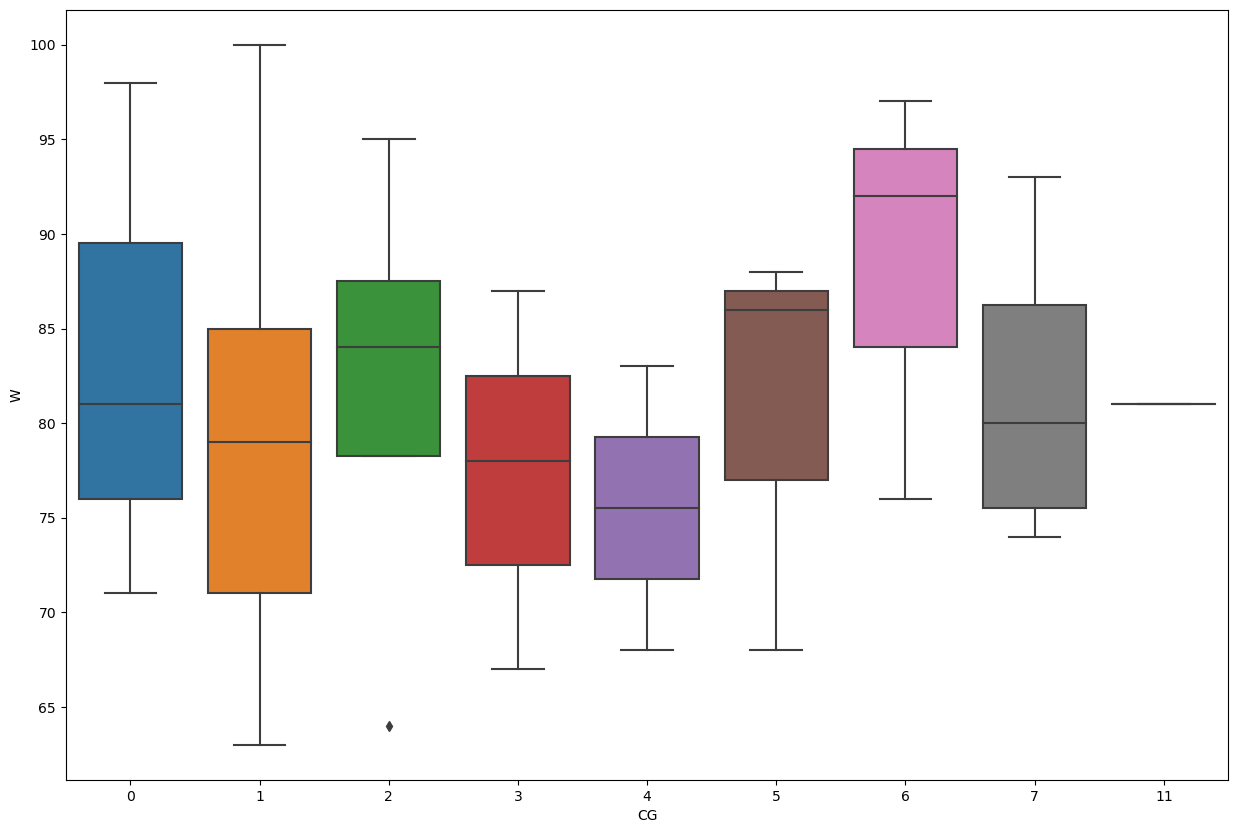

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


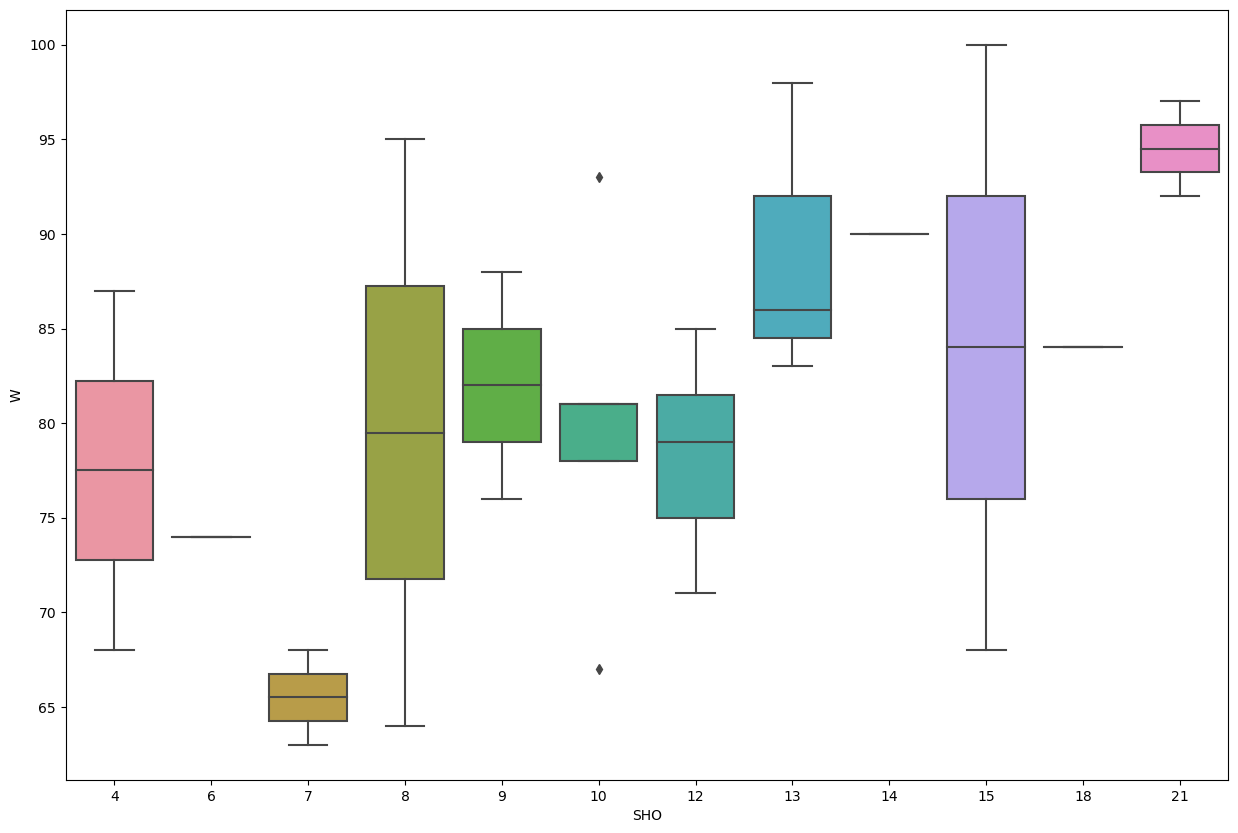

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


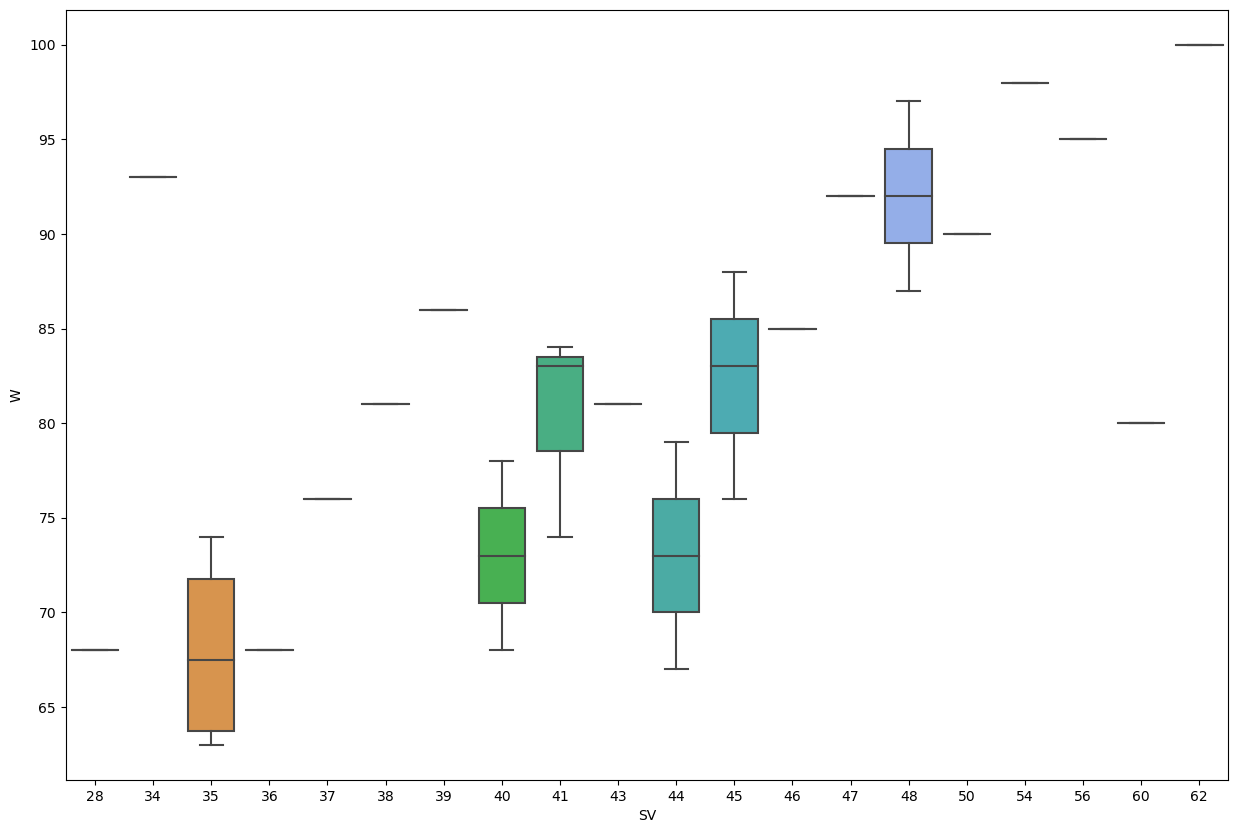

C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


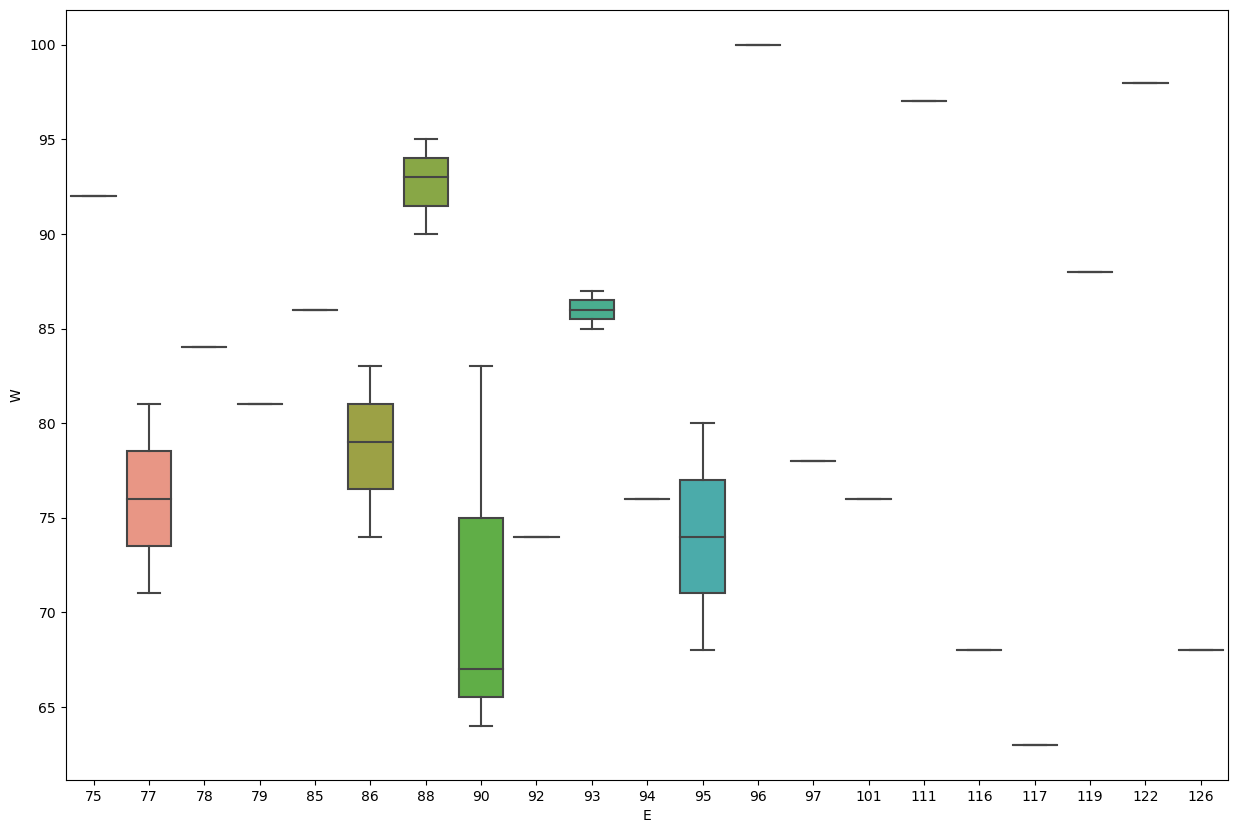

In [68]:

for i in col:
    plt.figure(figsize=(15,10))
    sns.boxplot(df[i],df['W'])
    plt.show()

In [69]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [70]:
from scipy.stats import zscore

In [71]:
z=np.abs(zscore(df))
z

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.505110,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.197838,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.248930,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.003243,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,0.751623,0.641347,2.772641,0.320914,0.654856,1.117242
3,0.483244,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,0.103922,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,1.042600,0.607197
5,1.170814,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.257184,0.389104,0.350165,1.300442,0.320914,1.171848,0.461470
6,0.587028,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.137760,0.234429,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.003243,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.067235,0.147424,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.094054,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.652129,0.461608,0.484557,0.907856,0.172800,2.188598,0.048576
9,0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.913544,0.843461,0.792164,0.171757,0.320914,0.396360,0.194303


In [72]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [73]:
df1=df[(z<3).all(axis=1)]
df1

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [74]:
print("shape of old dataframe df :",df.shape)
print("shape of new data frame df_new :",df1.shape)

shape of old dataframe df : (30, 17)
shape of new data frame df_new : (29, 17)


In [75]:
# split the data into x and y
x=df1.drop(['W'],axis=1)

In [76]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [77]:
y=df1['W']
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [78]:
# scaling the features
from sklearn.preprocessing import StandardScaler

In [79]:
st=StandardScaler()

In [80]:
x=st.fit_transform(x)
x

array([[ 0.95939835,  0.83008422,  1.73830631,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.66451353,
        -0.51114812, -0.51138828, -0.50148589, -0.81326172,  1.64315663,
        -0.47109143],
       [ 0.33114717, -0.70283074, -0.93869788,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.15463823,
         0.23216082,  0.23895226, -0.50148589,  0.15929869,  0.21100645,
        -0.61489829],
       [-0.27466646, -1.10025314, -0.10665604,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.67839746,
        -0.75415297, -0.64380131,  2.85461197, -0.32698152, -0.70036184,
        -1.1182223 ],
       [-1.32923093,  0.23395062, -0.35988616, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,
         0.08921679,  0.04033271,  1.36301292, -0.57012162, -0.83055731,
         0.46365315],
       [ 0.17408438,  1.25589393,  2

In [81]:
# split the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [82]:
print(x_train.shape),print(x_test.shape),print(y_train.shape),print(y_test.shape)

(20, 16)
(9, 16)
(20,)
(9,)


(None, None, None, None)

# Train the Data

# Linear Regression

In [83]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
predlr_train=lr.predict(x_train)
print("r2 score:", r2_score(y_test,predlr))
print("r2 score on training data:", r2_score(y_train,predlr_train))
print("mean squared error:", mean_squared_error(y_test,predlr))
print("mean_absolute_error:",mean_absolute_error(y_test,predlr))      

r2 score: 0.31150256777764906
r2 score on training data: 0.9701630157427424
mean squared error: 67.48974829438846
mean_absolute_error: 6.471635677446061


C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='W'>

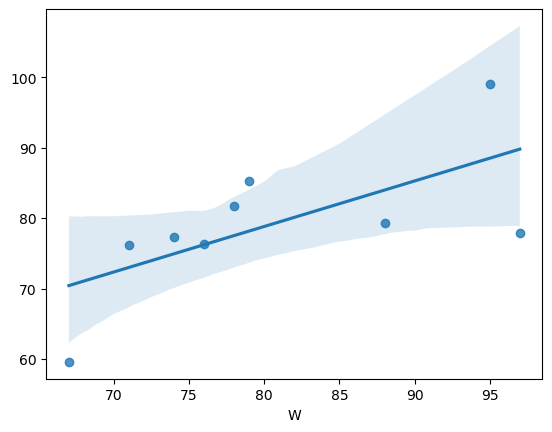

In [84]:
sns.regplot(y_test,predlr)

lr is not perfoming well , has very low r2 score

# KNeighbors Regressor

In [85]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
predknn_train=knn.predict(x_train)
print("r2 score:", r2_score(y_test,predknn))
print("r2 score on training data:", r2_score(y_train,predknn_train))
print("mean squared error:", mean_squared_error(y_test,predknn))
print("mean_absolute_error:",mean_absolute_error(y_test,predknn))      

r2 score: 0.38809068010075576
r2 score on training data: 0.8223449308594025
mean squared error: 59.98222222222221
mean_absolute_error: 6.177777777777777


C:\Users\A\folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='W'>

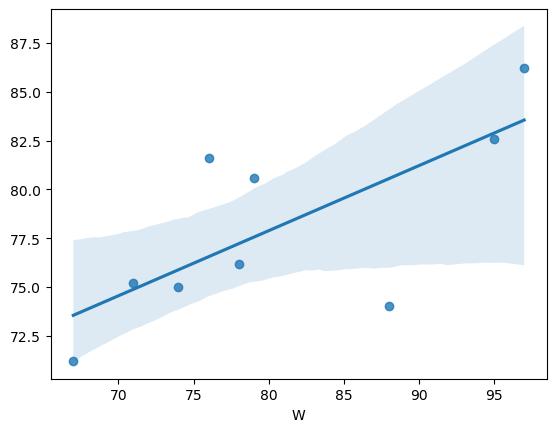

In [86]:
sns.regplot(y_test,predknn)

knn has low r2 score not perfoming good

Text(0, 0.5, 'True values')

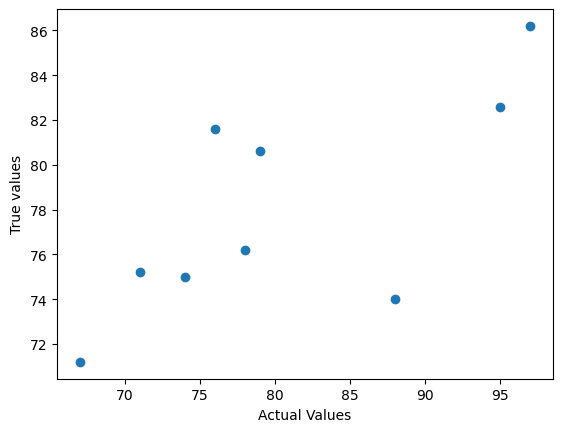

In [87]:
plt.scatter(y_test,predknn)
plt.xlabel('Actual Values')
plt.ylabel('True values')

# parametric tunning with SVR

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
svm=SVR()
parameter={'kernel':['rbf','linear','poly'],'C':[1,10]}
gsv=GridSearchCV(estimator=svm,param_grid=parameter)
gsv.fit(x,y)
print(gsv.best_params_)
print(gsv.best_score_)

{'C': 1, 'kernel': 'linear'}
0.3079577896379647


by the hyperparametric tunning "linear" is best

In [91]:
svm=SVR(kernel='linear',C=1)
svm.fit(x_train,y_train)
predsvm=svm.predict(x_test)
predsvm_train=svm.predict(x_train)
print("r2 score:", r2_score(y_test,predsvm))
print("r2 score on training data:", r2_score(y_train,predsvm_train))
print("mean squared error:", mean_squared_error(y_test,predsvm))
print("mean_absolute_error:",mean_absolute_error(y_test,predsvm))      

r2 score: 0.8000799421367976
r2 score on training data: 0.9063385765215093
mean squared error: 19.597101968318853
mean_absolute_error: 3.1631885701099063


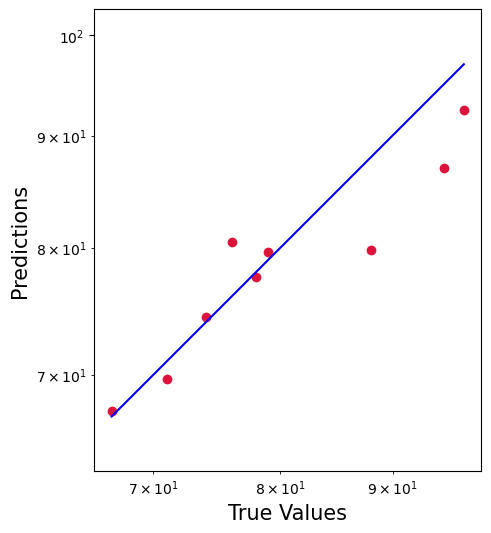

In [148]:
plt.figure(figsize=(5,6))
plt.scatter(y_test, predsvm, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predsvm), max(y_test))
p2 = min(min(predsvm), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

svm performs well with good r2 score

In [94]:
import warnings
warnings.filterwarnings("ignore")

# Parametric tunning with Lasso,Ridge and ElasticNet

In [95]:
ls=Lasso()
rd=Ridge()

In [96]:
parameter1={"alpha":[1,.1,.01,.001,.0001]}
gsv=GridSearchCV(estimator=ls,param_grid=parameter1)
gsv.fit(x,y)
print(gsv.best_params_)
print(gsv.best_score_)

{'alpha': 1}
0.4152252452373908


In [97]:
parameter1={"alpha":[1,.1,.01,.001,.0001]}
gsv=GridSearchCV(estimator=rd,param_grid=parameter1)
gsv.fit(x,y)
print(gsv.best_params_)
print(gsv.best_score_)

{'alpha': 1}
0.33747787690695574


In [98]:
from sklearn.linear_model import ElasticNet

In [99]:
enr=ElasticNet()

In [100]:
parameter1={"alpha":[1,.1,.01,.001,.0001]}
gsv=GridSearchCV(estimator=enr,param_grid=parameter1)
gsv.fit(x,y)
print(gsv.best_params_)
print(gsv.best_score_)

{'alpha': 0.1}
0.3552727260368846


# Lasso

In [101]:
ls=Lasso(alpha=1)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
predls_train=ls.predict(x_train)
print("r2 score:", r2_score(y_test,predls))
print("r2 score on training data:", r2_score(y_train,predls_train))
print("mean squared error:", mean_squared_error(y_test,predls))
print("mean_absolute_error:",mean_absolute_error(y_test,predls))   

r2 score: 0.7545210615800038
r2 score on training data: 0.8840339506618702
mean squared error: 24.062997173515683
mean_absolute_error: 3.904045187774036


# Ridge

In [102]:
rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
predrd_train=rd.predict(x_train)
print("r2 score:", r2_score(y_test,predrd))
print("r2 score on training data:", r2_score(y_train,predrd_train))
print("mean squared error:", mean_squared_error(y_test,predrd))
print("mean_absolute_error:",mean_absolute_error(y_test,predrd))   

r2 score: 0.8160025205102239
r2 score on training data: 0.9276222055669237
mean squared error: 18.03629613763978
mean_absolute_error: 2.9954185726974063


Text(0, 0.5, 'predicted values')

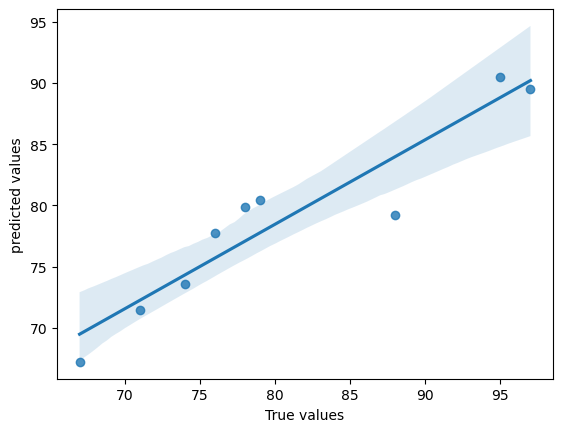

In [141]:
sns.regplot(y_test,predrd)
plt.xlabel('True values')
plt.ylabel('predicted values')

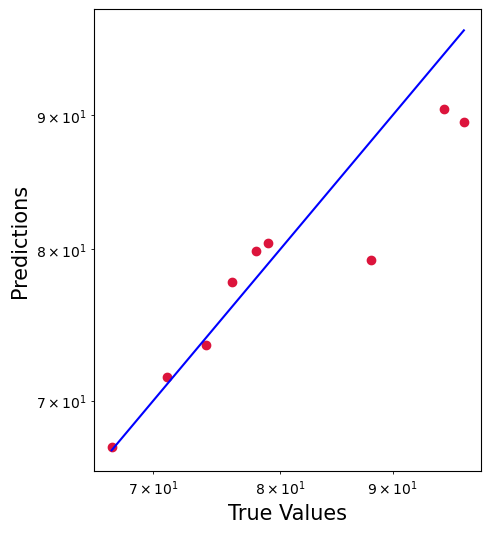

In [150]:
plt.figure(figsize=(5,6))
plt.scatter(y_test, predrd, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predrd), max(y_test))
p2 = min(min(predrd), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.show()

ridge performs well with good r2 score

# ElasticNet

In [103]:
enr=ElasticNet(alpha=0.1)
enr.fit(x_train,y_train)
predenr=enr.predict(x_test)
predenr_train=enr.predict(x_train)
print("r2 score:", r2_score(y_test,predenr))
print("r2 score on training data:", r2_score(y_train,predenr_train))
print("mean squared error:", mean_squared_error(y_test,predenr))
print("mean_absolute_error:",mean_absolute_error(y_test,predenr))   

r2 score: 0.8032139071135999
r2 score on training data: 0.9250663437278879
mean squared error: 19.28989601874095
mean_absolute_error: 3.1669909307194626


it also performs good with low error

# DecisionTreeRegressor

In [104]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
preddtc_train=dtc.predict(x_train)
print("r2 score:", r2_score(y_test,preddtc))
print("r2 score on training data:", r2_score(y_train,preddtc_train))
print("mean squared error:", mean_squared_error(y_test,preddtc))
print("mean_absolute_error:",mean_absolute_error(y_test,preddtc))   

r2 score: -0.18337531486146097
r2 score on training data: 1.0
mean squared error: 116.0
mean_absolute_error: 9.777777777777779


Text(0, 0.5, 'Predicted value')

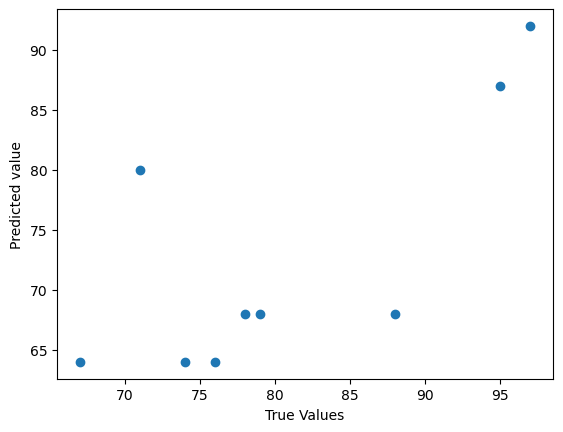

In [114]:
plt.scatter(y_test,preddtc)
plt.xlabel("True Values")
plt.ylabel("Predicted value")

dtc--> it performs very bad , r2 score is in goes negative

# RandomForestRegressor

In [116]:
random=RandomForestRegrssor()
random.fit(x_train,y_train)
predrandom=random.predict(x_test)
predrandom_train=random.predict(x_train)
print("r2 score:", r2_score(y_test,predrandom))
print("r2 score on training data:", r2_score(y_train,predrandom_train))
print("mean squared error:", mean_squared_error(y_test,predrandom))
print("mean_absolute_error:",mean_absolute_error(y_test,predrandom))   

r2 score: 0.2612293324937027
r2 score on training data: 0.9728578581623342
mean squared error: 72.41776666666667
mean_absolute_error: 7.0344444444444445


# AdaBoostREgressor

In [152]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(learning_rate=1.0)

In [138]:
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
predada_train=ada.predict(x_train)
print("r2 score:", r2_score(y_test,predada))
print("r2 score on training data:", r2_score(y_train,predada_train))
print("mean squared error:", mean_squared_error(y_test,predada))
print("mean_absolute_error:",mean_absolute_error(y_test,predada))   

r2 score: 0.0005737475510773082
r2 score on training data: 0.9948019511352433
mean squared error: 97.9684499314129
mean_absolute_error: 8.4320987654321


# GradientBoosting Regressor

In [139]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [140]:
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
predgbr_train=gbr.predict(x_train)
print("r2 score:", r2_score(y_test,predgbr))
print("r2 score on training data:", r2_score(y_train,predgbr_train))
print("mean squared error:", mean_squared_error(y_test,predgbr))
print("mean_absolute_error:",mean_absolute_error(y_test,predgbr))   

r2 score: -0.009989960682638355
r2 score on training data: 0.9999999537011696
mean squared error: 99.00395417061912
mean_absolute_error: 8.914642192619503


 GradientBoostingRegressor , AdaBoostRegressor , RandomForestRegrssor  are  perfoming  very bad , these r2 score is very less

# comparing r2_score and errors

In [164]:
conculusion={"Models":['Linear Regression','SVR','Decision Tree','KNeighbors Regressor','Lasso','Ridge','ElasticNet','AdaBoost Regressor','GradientBoost Regressor','RandomForestRegressor'],
            "r2_score":[ r2_score(y_test,predlr),r2_score(y_test,predsvm),r2_score(y_test,preddtc),r2_score(y_test,predknn),r2_score(y_test,predls),r2_score(y_test,predrd),r2_score(y_test,predenr),r2_score(y_test,predada),r2_score(y_test,predgbr),r2_score(y_test,predrandom)]}

In [165]:
scores=pd.DataFrame(conculusion)

In [166]:
scores

,Models,r2_score
0,Linear Regression,0.311503
1,SVR,0.800080
2,Decision Tree,-0.183375
3,KNeighbors Regressor,0.388091
4,Lasso,0.754521
5,Ridge,0.816003
6,ElasticNet,0.803214
7,AdaBoost Regressor,0.000574
8,GradientBoost Regressor,-0.009990
9,RandomForestRegressor,0.261229


# now comparing all scores from above

1.Ridge

2.ElasticNet

3.SVR

4.Lasso

These  four are performing very well with good r2_score

and out four "RIDGE" perform best 


Rest of them prforms very bad with lowest r2_score

# cross_val_score

In [167]:
# cross val score with ridge
score=cross_val_score(rd,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[ 0.62048856 -1.33986752  0.66206613  0.88400025  0.86070197]
0.33747787690695574
0.8451497257649989


Ridge is the best model to save it gives best r2_score 

Ridge will reduce down the coefficient differences it effect target variable and reduce down the the error.

# Save Model Ridge

In [168]:
import pickle
filename="Ridge.pkl"
pickle.dump(rd,open(filename,'wb'))

load_model=pickle.load(open(filename,'rb'))
load_model.predict(x_test)

array([73.53534266, 89.48688608, 77.72168667, 67.20448757, 79.89270767,
       79.24581922, 71.46539082, 90.51771246, 80.46025485])

In [169]:
result=pd.DataFrame([load_model.predict(x_test)[:],(y_test)[:]],index=["Predicted","Original"])
result

,0,1,2,3,4,5,6,7,8
Predicted,73.535343,89.486886,77.721687,67.204488,79.892708,79.245819,71.465391,90.517712,80.460255
Original,74.000000,97.000000,76.000000,67.000000,78.000000,88.000000,71.000000,95.000000,79.000000


In [170]:
predicted=load_model.predict(x_test)[:]
original=y_test[:]

Text(0, 0.5, 'predicted values')

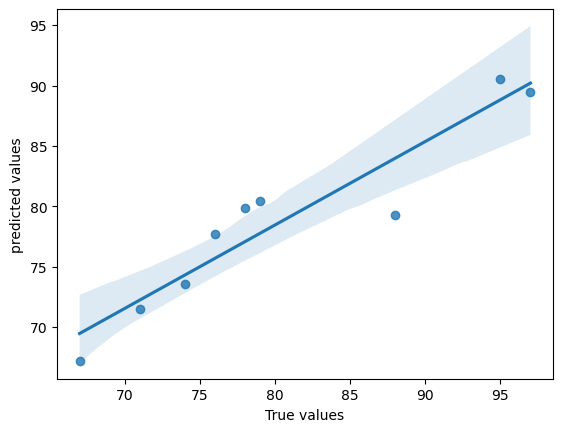

In [171]:
sns.regplot(original,predicted)
plt.xlabel("True values")
plt.ylabel("predicted values")